# Abertura do Arquivo SRAG 2009 - 2022


In [1]:
# Carregamento de bibliotecas 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import numpy as np

pd.set_option('max_columns', None)

In [2]:
#Código para otimizar o uso de memória na abertura do arquivo csv

def carregarArq(caminho, separ):
    chunks = []
    dados_chunks = pd.DataFrame()
    for chunk in pd.read_csv(caminho, sep= separ, encoding = 'utf-8-sig', chunksize=200000):
        chunks.append(chunk)
    dados_chunks = pd.concat(chunks)
    return dados_chunks

In [3]:
# Altera o tipo de dados object para category a fim de otimizar o uso memória para armazenamento do arquivo csv
def alteraType(data):
    data_atu = data.select_dtypes('object').columns 
    data[data_atu] = data[data_atu].astype('category')
    return data


In [4]:
# Abertura e modificação de tipos
path = r"C:\Users\eluar\Documents\Estudo_IA_Python\AESOP_Projeto\Dados_AESOP\SRAG_PROCESSADO\SRAG_AGP.csv"
df = carregarArq(path, ",")
df_at = alteraType(df)
df_at.drop('Unnamed: 0', axis=1, inplace=True)#Apaga a coluna Unnamed: 0
df_at['DT_NOTIFIC'] = pd.to_datetime(df_at['DT_NOTIFIC'], dayfirst=True)
df_at['ANO'] = df_at['DT_NOTIFIC'].dt.year
df_at['MES']  = df_at['DT_NOTIFIC'].dt.month
df_at.reset_index()
display(df_at)
#print(df_at['CO_MUN_RES'].value_counts())

,DT_NOTIFIC,DT_SIN_PRI,DT_NASC,CS_SEXO,CS_RACA,CLASSI_FIN,CLASSI_OUT,CRITERIO,SEM_NOT,SG_UF_NOT,SG_UF,ID_MUNICIP,CO_MUN_NOT,LAT_MUNI,LON_MUNI,ID_MN_RESI,CO_MUN_RES,LAT_MUNI_RES,LON_MUNI_RES,SEM_PRI,ANO,MES
0,2009-12-10,09/12/2009,06/04/1953,M,1.0,1.0,NaN,1.0,49,RO,SP,Porto Velho,1100205,-8.76077,-63.8999,Alta Floresta D'Oeste,1100015.0,-11.92830,-61.9953,NaN,2009.0,12.0
1,2009-08-14,07/08/2009,12/06/1990,M,NaN,3.0,NaN,1.0,32,MS,RO,Campo Grande,5002704,-20.44860,-54.6295,Alta Floresta D'Oeste,1100015.0,-11.92830,-61.9953,NaN,2009.0,8.0
2,2009-08-10,03/08/2009,15/01/2009,M,1.0,3.0,NaN,1.0,32,MG,RO,Belo Horizonte,3106200,-19.91020,-43.9266,Ariquemes,1100023.0,-9.90571,-63.0325,NaN,2009.0,8.0
3,2009-08-19,19/08/2009,10/03/1959,F,1.0,2.0,INFLUENZA SANZONAL,2.0,33,RO,PA,Cacoal,1100049,-11.43430,-61.4562,Cacoal,1100049.0,-11.43430,-61.4562,NaN,2009.0,8.0
4,2009-08-19,19/08/2009,01/10/1989,F,1.0,2.0,INFLUENZA SANZONAL,2.0,33,RO,PA,Cacoal,1100049,-11.43430,-61.4562,Cacoal,1100049.0,-11.43430,-61.4562,NaN,2009.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827103,2022-09-03,03/09/2022,19/12/1944,F,4.0,4.0,NaN,2.0,35,PE,PE,Jaboatão dos Guararapes,2607901,-8.11298,-35.0150,Abreu e Lima,2600054.0,-7.90072,-34.8984,35.0,2022.0,9.0
3827104,2022-12-05,30/11/2022,13/06/1992,F,9.0,4.0,NaN,1.0,49,RJ,RJ,Niterói,3303302,-22.88320,-43.1034,Niterói,3303302.0,-22.88320,-43.1034,48.0,2022.0,12.0
3827105,2022-12-06,30/11/2022,17/10/1975,M,4.0,NaN,NaN,NaN,49,MS,MS,Dourados,5003702,-22.22310,-54.8120,Fátima do Sul,5003801.0,-22.37890,-54.5131,48.0,2022.0,12.0
3827106,2022-01-31,22/01/2022,01/06/2020,M,4.0,4.0,NaN,1.0,5,CE,CE,Várzea Alegre,2314003,-6.78264,-39.2942,Várzea Alegre,2314003.0,-6.78264,-39.2942,3.0,2022.0,1.0


# Contagem de informações básicas para identificar a consistência da base

In [5]:
print("Total de registros: ", len(df_at['DT_NOTIFIC']))
print("Quantidade de casos segundo unidades que realizaram a notificação: ",df_at['ID_MUNICIP'].count())
print('Quantidade de casos segundo municípios de residência do paciente: ', df_at['ID_MN_RESI'].count())
print('Diferença numérica entre total de registros e a QTD de unidades que realizaram notificação: ', (len(df_at['DT_NOTIFIC']) - df_at['ID_MUNICIP'].count()))
print('Diferença numérica entre total de registros e a QTD demunicípios de residência do paciente: ',(len(df_at['DT_NOTIFIC']) - df_at['ID_MN_RESI'].count()))
porc_UNI = (((len(df_at['DT_NOTIFIC'])-df_at['ID_MUNICIP'].count())/len(df_at['DT_NOTIFIC']))*100)
porc_RES = (((len(df_at['DT_NOTIFIC'])-df_at['ID_MN_RESI'].count())/len(df_at['DT_NOTIFIC']))*100)
print("Porcentagem total registro x Unidade Notificação",porc_UNI)
print("Porcentagem total registro x Residencia paciente",porc_RES)


Total de registros:  3827108
Quantidade de casos segundo unidades que realizaram a notificação:  3827090
Quantidade de casos segundo municípios de residência do paciente:  3757727
Diferença numérica entre total de registros e a QTD de unidades que realizaram notificação:  18
Diferença numérica entre total de registros e a QTD demunicípios de residência do paciente:  69381
Porcentagem total registro x Unidade Notificação 0.0004703290317388482
Porcentagem total registro x Residencia paciente 1.8128832528373904


# Quantidade de casos ocorridos em cada ano
* Quantidade de casos ocorridos relatados por Unidade Sentinela ao longo dos anos
* SG_UF_NOT é a unidade Federativa onde está localizada a unidade sentinela que realizou a notificação

,Anos,N_Casos
0,2009,88082
1,2010,11542
2,2011,4375
3,2012,21109
4,2013,36531
5,2014,19028
6,2015,14525
7,2016,54269
8,2017,29496
9,2018,47879


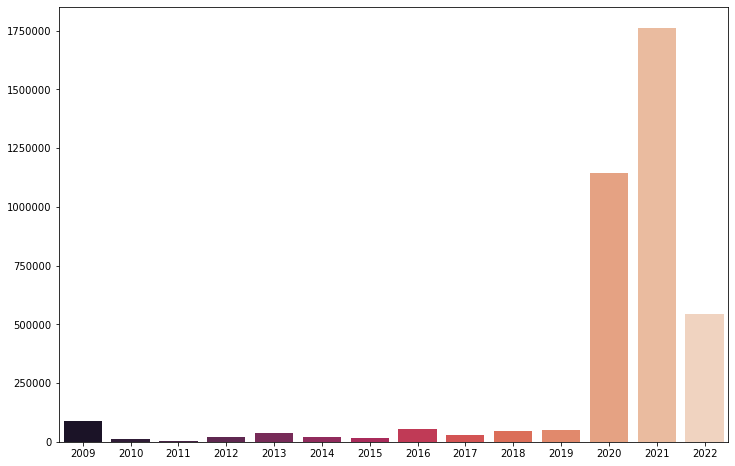

In [6]:
#Seleciona os campos específicos e realiza o agrupamento 
qtd_casos = df_at[['ANO','SG_UF_NOT']]
qtd_casos = qtd_casos.groupby(['ANO']).count()

#Pega a lista de anos e o numero de casos e converte para os tipos específicos 
anos = list(qtd_casos.index.astype('int64'))
qtd_ca = list(qtd_casos.SG_UF_NOT)

#Converte para DATAFRAME 
base = pd.DataFrame({'Anos':anos, 'N_Casos':qtd_ca})
display(base)

plt.figure(figsize=(12, 8))
sns.barplot(x = anos, y = qtd_ca, palette="rocket")

# Quantidade de casos por UF em cada ano
* Quantidade de casos notificados por UF relatados por Unidade Sentinela ao longo dos anos 

SG_UF_NOT,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
ANO,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009.0,230,58,310,29,499,161,923,413,1220,84,5483,306,284,1338,129,541,232,39391,5390,1322,70,65,5018,4771,25,19722,68
2010.0,49,47,98,37,120,83,117,46,386,113,597,38,49,822,19,100,163,3105,314,178,100,0,512,620,2,3810,17
2011.0,27,5,5,0,38,28,35,11,86,6,955,39,4,27,2,7,41,724,77,13,10,0,1245,206,0,776,8
2012.0,58,21,33,12,182,141,316,41,344,8,2947,287,36,161,22,108,36,4210,293,194,9,3,3959,3228,5,4425,30
2013.0,139,45,24,2,433,303,373,168,397,13,5345,518,42,724,21,1042,118,5129,915,279,44,20,3116,2857,6,14424,34
2014.0,144,17,73,0,419,154,181,89,360,62,2741,570,208,187,20,1142,92,2853,658,201,107,41,1955,1330,0,5382,42
2015.0,123,1,36,3,313,220,140,79,322,31,1374,283,89,173,11,993,29,2545,524,172,60,9,2317,757,3,3905,13
2016.0,374,143,130,31,1088,527,671,919,1086,44,4914,1690,354,987,280,1585,207,6596,2488,348,166,31,5619,2786,121,21004,80
2017.0,248,28,493,10,578,265,739,470,591,45,3089,716,138,824,219,1843,192,4448,1147,240,37,10,3169,1500,95,8292,70


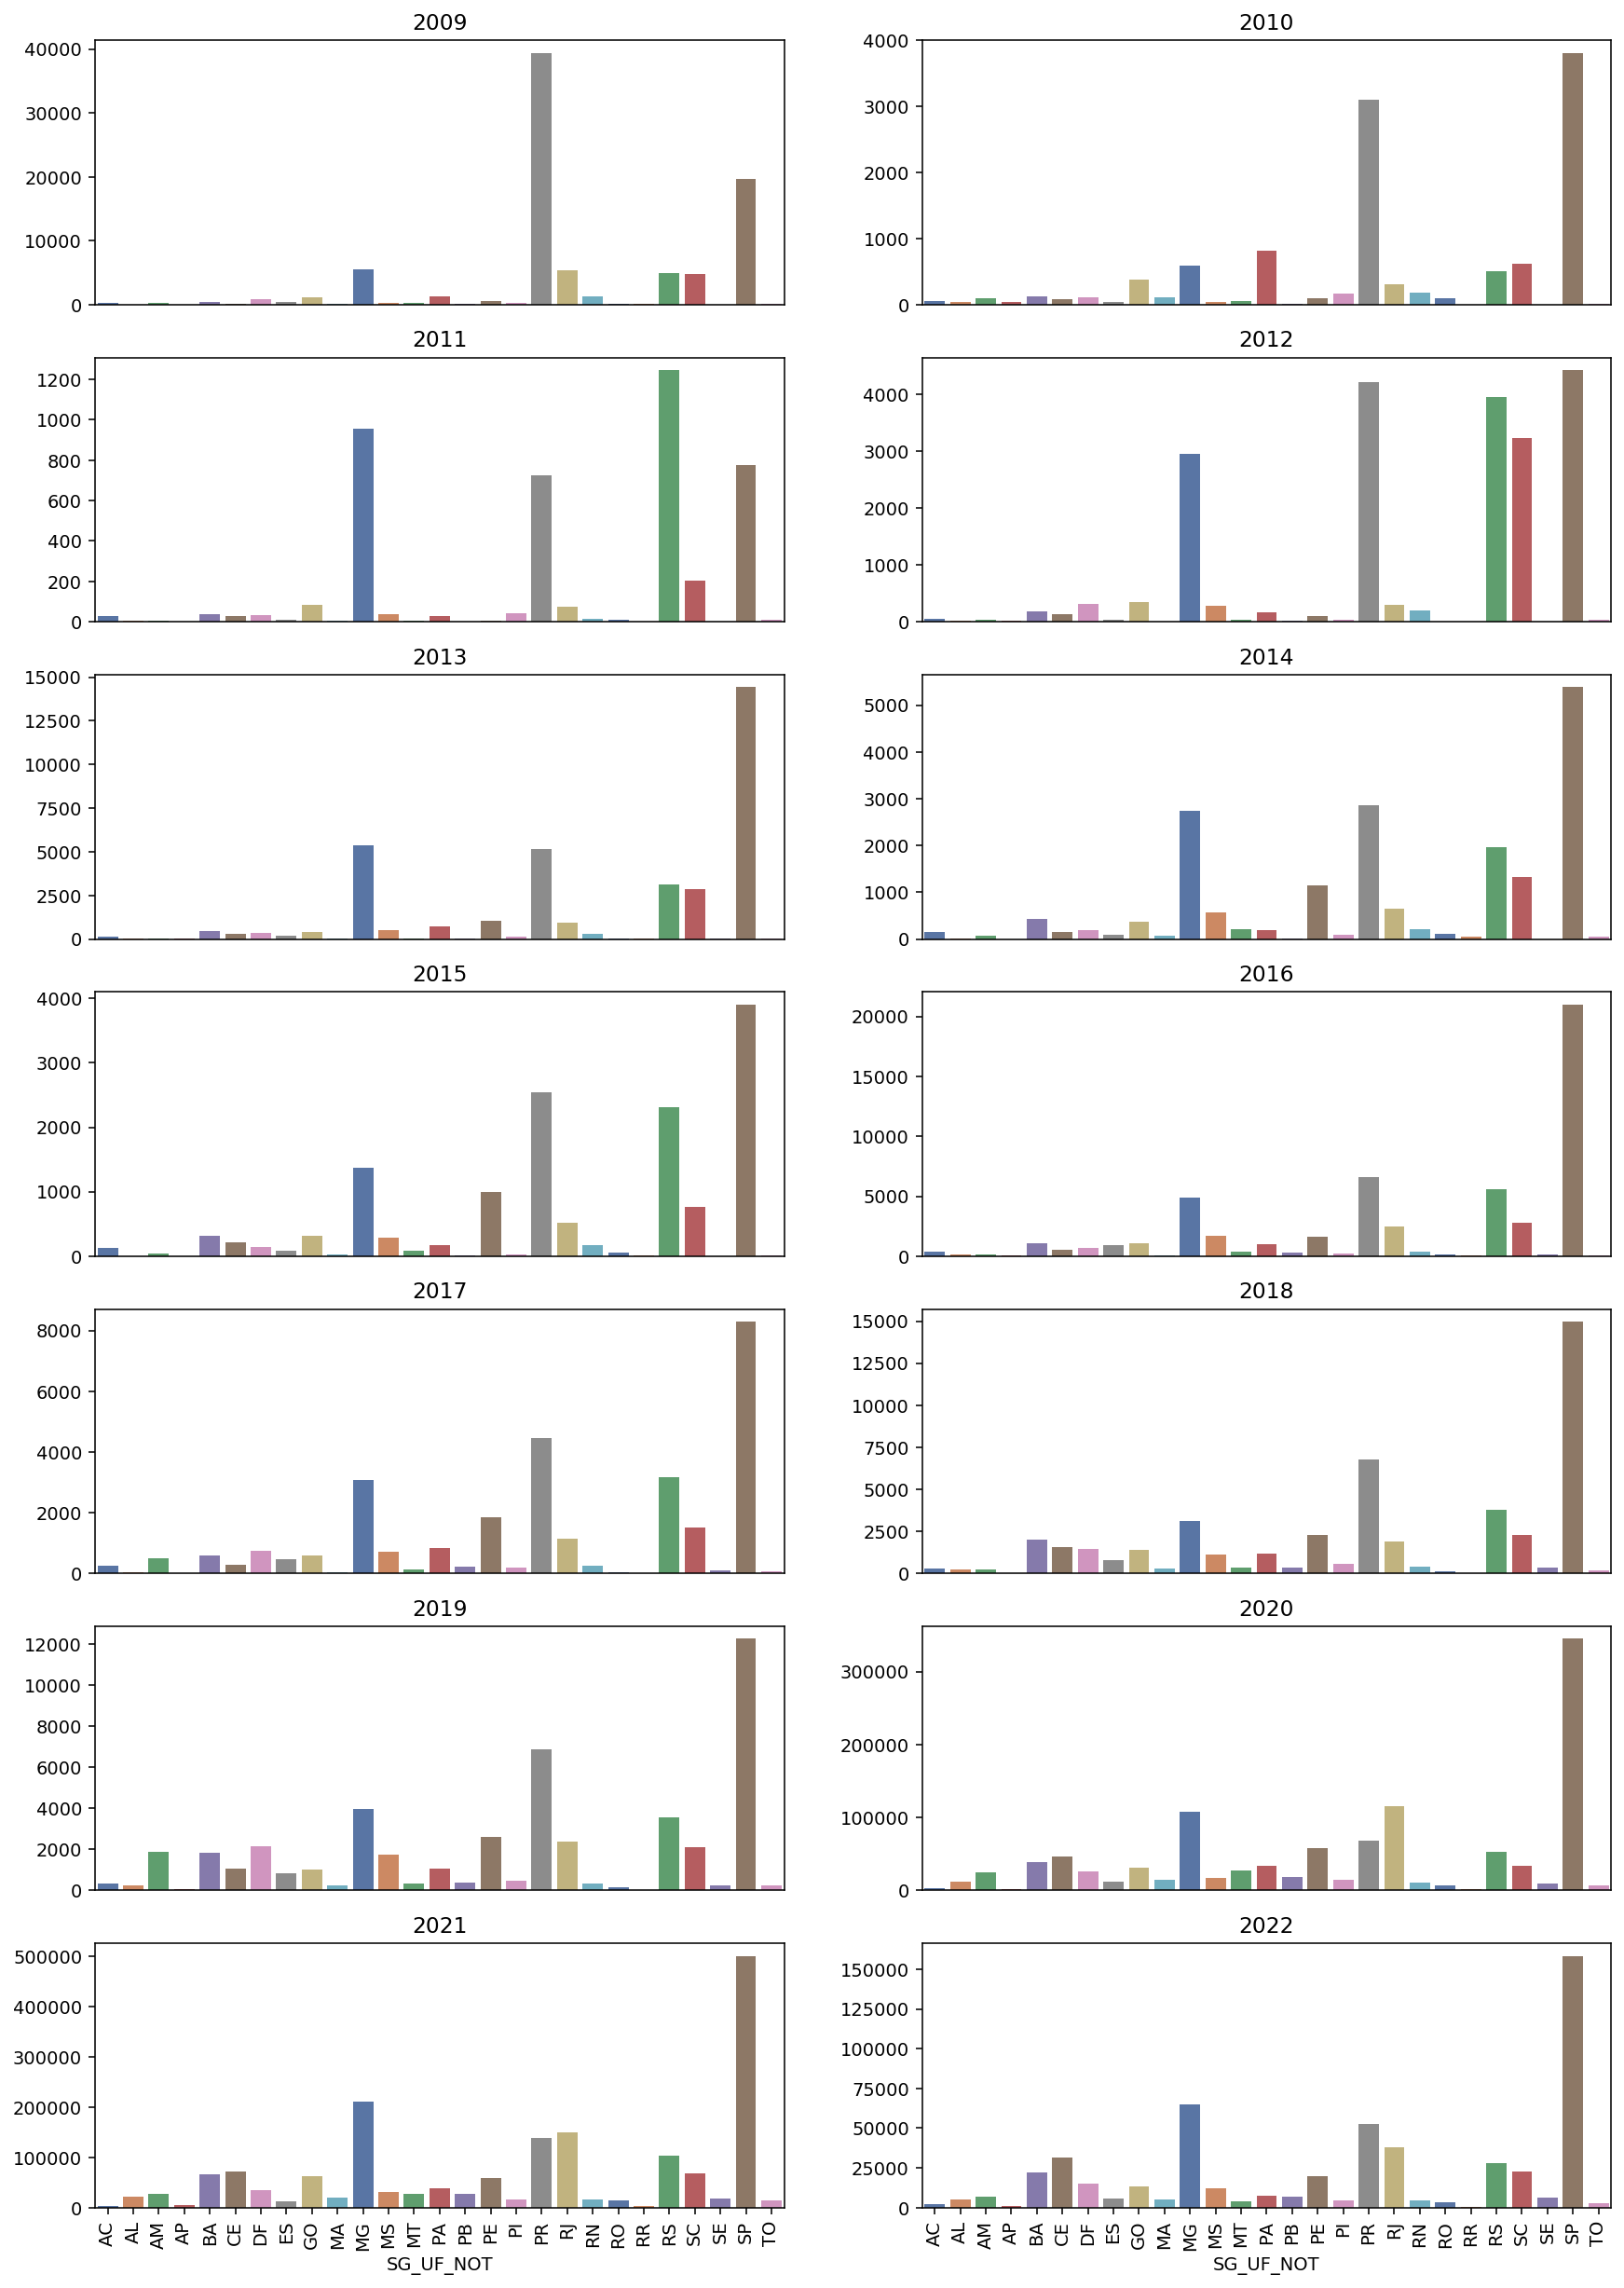

In [7]:
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(15, 22), dpi=140)

# Aplicando filtros
dados_2009 = df_at[df_at['ANO'] == 2009]
dados_2010 = df_at[df_at['ANO'] == 2010]
dados_2011 = df_at[df_at['ANO'] == 2011]
dados_2012 = df_at[df_at['ANO'] == 2012]
dados_2013 = df_at[df_at['ANO'] == 2013]
dados_2014 = df_at[df_at['ANO'] == 2014]
dados_2015 = df_at[df_at['ANO'] == 2015]
dados_2016 = df_at[df_at['ANO'] == 2016]
dados_2017 = df_at[df_at['ANO'] == 2017]
dados_2018 = df_at[df_at['ANO'] == 2018]
dados_2019 = df_at[df_at['ANO'] == 2019]
dados_2020 = df_at[df_at['ANO'] == 2020]
dados_2021 = df_at[df_at['ANO'] == 2021]
dados_2022 = df_at[df_at['ANO'] == 2022]

#Agrupando por estados ao longo dos anos 
dados_AGP_cp = df_at[['ANO','SG_UF_NOT']]
dados_AGP_cp = dados_AGP_cp.groupby(['ANO','SG_UF_NOT'])['SG_UF_NOT'].count()
df = dados_AGP_cp.unstack() 
display(df)

#Agrupando por estados as informações para plotagem 
qtd_casos_p_UF_2009 = dados_2009.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2010 = dados_2010.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2011 = dados_2011.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2012 = dados_2012.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2013 = dados_2013.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2014 = dados_2014.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2015 = dados_2015.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2016 = dados_2016.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2017 = dados_2017.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2018 = dados_2018.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2019 = dados_2019.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2020 = dados_2020.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2021 = dados_2021.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()
qtd_casos_p_UF_2022 = dados_2022.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()


#Plotando a quantidade de casos por UF ao longo dos anos 
sns.barplot(x = qtd_casos_p_UF_2009.index, y = list(qtd_casos_p_UF_2009), ax = axes[0,0], palette="deep"); axes[0,0].set_title('2009')
sns.barplot(x = qtd_casos_p_UF_2010.index, y = list(qtd_casos_p_UF_2010), ax = axes[0,1], palette="deep"); axes[0,1].set_title('2010')
sns.barplot(x = qtd_casos_p_UF_2011.index, y = list(qtd_casos_p_UF_2011), ax = axes[1,0], palette="deep"); axes[1,0].set_title('2011')
sns.barplot(x = qtd_casos_p_UF_2012.index, y = list(qtd_casos_p_UF_2012), ax = axes[1,1], palette="deep"); axes[1,1].set_title('2012')
sns.barplot(x = qtd_casos_p_UF_2013.index, y = list(qtd_casos_p_UF_2013), ax = axes[2,0], palette="deep"); axes[2,0].set_title('2013')
sns.barplot(x = qtd_casos_p_UF_2014.index, y = list(qtd_casos_p_UF_2014), ax = axes[2,1], palette="deep"); axes[2,1].set_title('2014')
sns.barplot(x = qtd_casos_p_UF_2015.index, y = list(qtd_casos_p_UF_2015), ax = axes[3,0], palette="deep"); axes[3,0].set_title('2015')
sns.barplot(x = qtd_casos_p_UF_2016.index, y = list(qtd_casos_p_UF_2016), ax = axes[3,1], palette="deep"); axes[3,1].set_title('2016')
sns.barplot(x = qtd_casos_p_UF_2017.index, y = list(qtd_casos_p_UF_2017), ax = axes[4,0], palette="deep"); axes[4,0].set_title('2017')
sns.barplot(x = qtd_casos_p_UF_2018.index, y = list(qtd_casos_p_UF_2018), ax = axes[4,1], palette="deep"); axes[4,1].set_title('2018')
sns.barplot(x = qtd_casos_p_UF_2019.index, y = list(qtd_casos_p_UF_2019), ax = axes[5,0], palette="deep"); axes[5,0].set_title('2019')
sns.barplot(x = qtd_casos_p_UF_2020.index, y = list(qtd_casos_p_UF_2020), ax = axes[5,1], palette="deep"); axes[5,1].set_title('2020')
g = sns.barplot(x = qtd_casos_p_UF_2021.index, y = list(qtd_casos_p_UF_2021), ax = axes[6,0], palette="deep"); axes[6,0].set_title('2021')
g.set_xticklabels(labels = list(qtd_casos_p_UF_2021.index), rotation=90)
g = sns.barplot(x = qtd_casos_p_UF_2022.index, y = list(qtd_casos_p_UF_2022), ax = axes[6,1], palette="deep"); axes[6,1].set_title('2022')
g.set_xticklabels(labels = list(qtd_casos_p_UF_2021.index), rotation=90)



for i in range(7):
    for j in range(2):
        if(i < 7-1):
            axes[i][j].xaxis.set_visible(False) #Retira os valores do eixo x de cada gráfico deixando apenas o do final





# Quantidade de casos acumulados por UF entre 2009 - 2022 

,UF,Quantidade
0,AC,11476
1,AL,39322
2,AM,62186
3,AP,8408
4,BA,135123
5,CE,154030
6,DF,82361
7,ES,34294
8,GO,114112
9,MA,41179


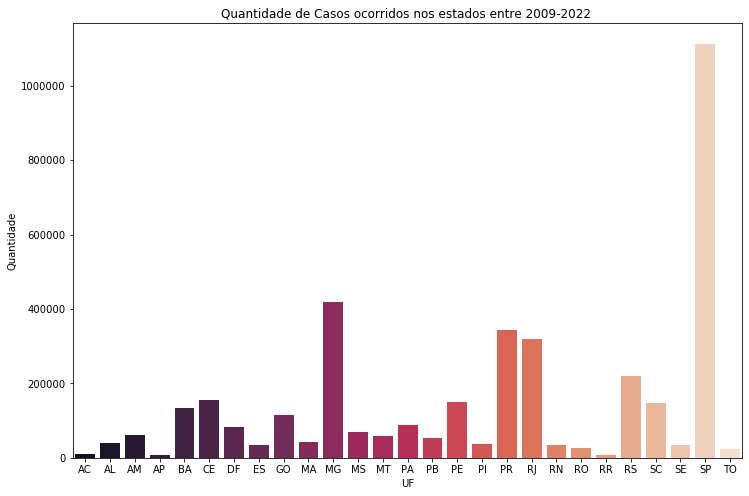

In [8]:
QTD_CASOS_UF = df_at.groupby(['SG_UF_NOT'])['SG_UF_NOT'].count()

Casos_Estado = pd.DataFrame()# cria um dataframe para receber a quantidade de casos acumulados ao longo dos anos p/UF
Casos_Estado['UF'] = QTD_CASOS_UF.index
Casos_Estado['Quantidade'] = list(QTD_CASOS_UF)
display(Casos_Estado)

plt.figure(figsize=(12, 8))
plt.title("Quantidade de Casos ocorridos nos estados entre 2009-2022 ")
sns.barplot(x = Casos_Estado['UF'] , y = Casos_Estado['Quantidade'], palette="rocket")
plt.show()


# Quantidade de casos relatados mensalmente ao longo dos anos 
* Casos relatados por Unidade que realizou notificação 
* Obs: Deve-se inserir a UF para realizar o filtro

In [9]:
# Pega os estados disponíveis na Base 
UF_DISP = list(df_at['SG_UF_NOT'].unique())

UFs disponíveis: 
['RO', 'MS', 'MG', 'SP', 'AC', 'AM', 'RN', 'DF', 'PA', 'RR', 'MT', 'PI', 'BA', 'RJ', 'GO', 'AP', 'TO', 'PR', 'MA', 'CE', 'PB', 'PE', 'AL', 'SE', 'ES', 'RS', 'SC']
Entre com a sigla da UF em maiusculo para realizar filtragem e gráficos:RJ


MES,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
ANO,,,,,,,,,,,,
2009.0,NaN,NaN,NaN,1.0,7,44,1275,3073,832,114,34,10
2010.0,7.0,5.0,33.0,52.0,88,56,26,26,7,6,4,4
2011.0,3.0,5.0,2.0,NaN,8,12,10,10,8,4,5,10
2012.0,4.0,9.0,10.0,16.0,39,41,61,46,14,27,11,15
2013.0,9.0,14.0,27.0,64.0,88,173,188,144,70,69,41,28
2014.0,31.0,23.0,24.0,48.0,102,89,85,61,92,48,28,27
2015.0,15.0,19.0,17.0,82.0,133,86,64,21,24,29,18,16
2016.0,13.0,26.0,87.0,673.0,663,463,294,117,68,27,27,30
2017.0,39.0,35.0,77.0,134.0,239,208,152,81,50,49,38,45


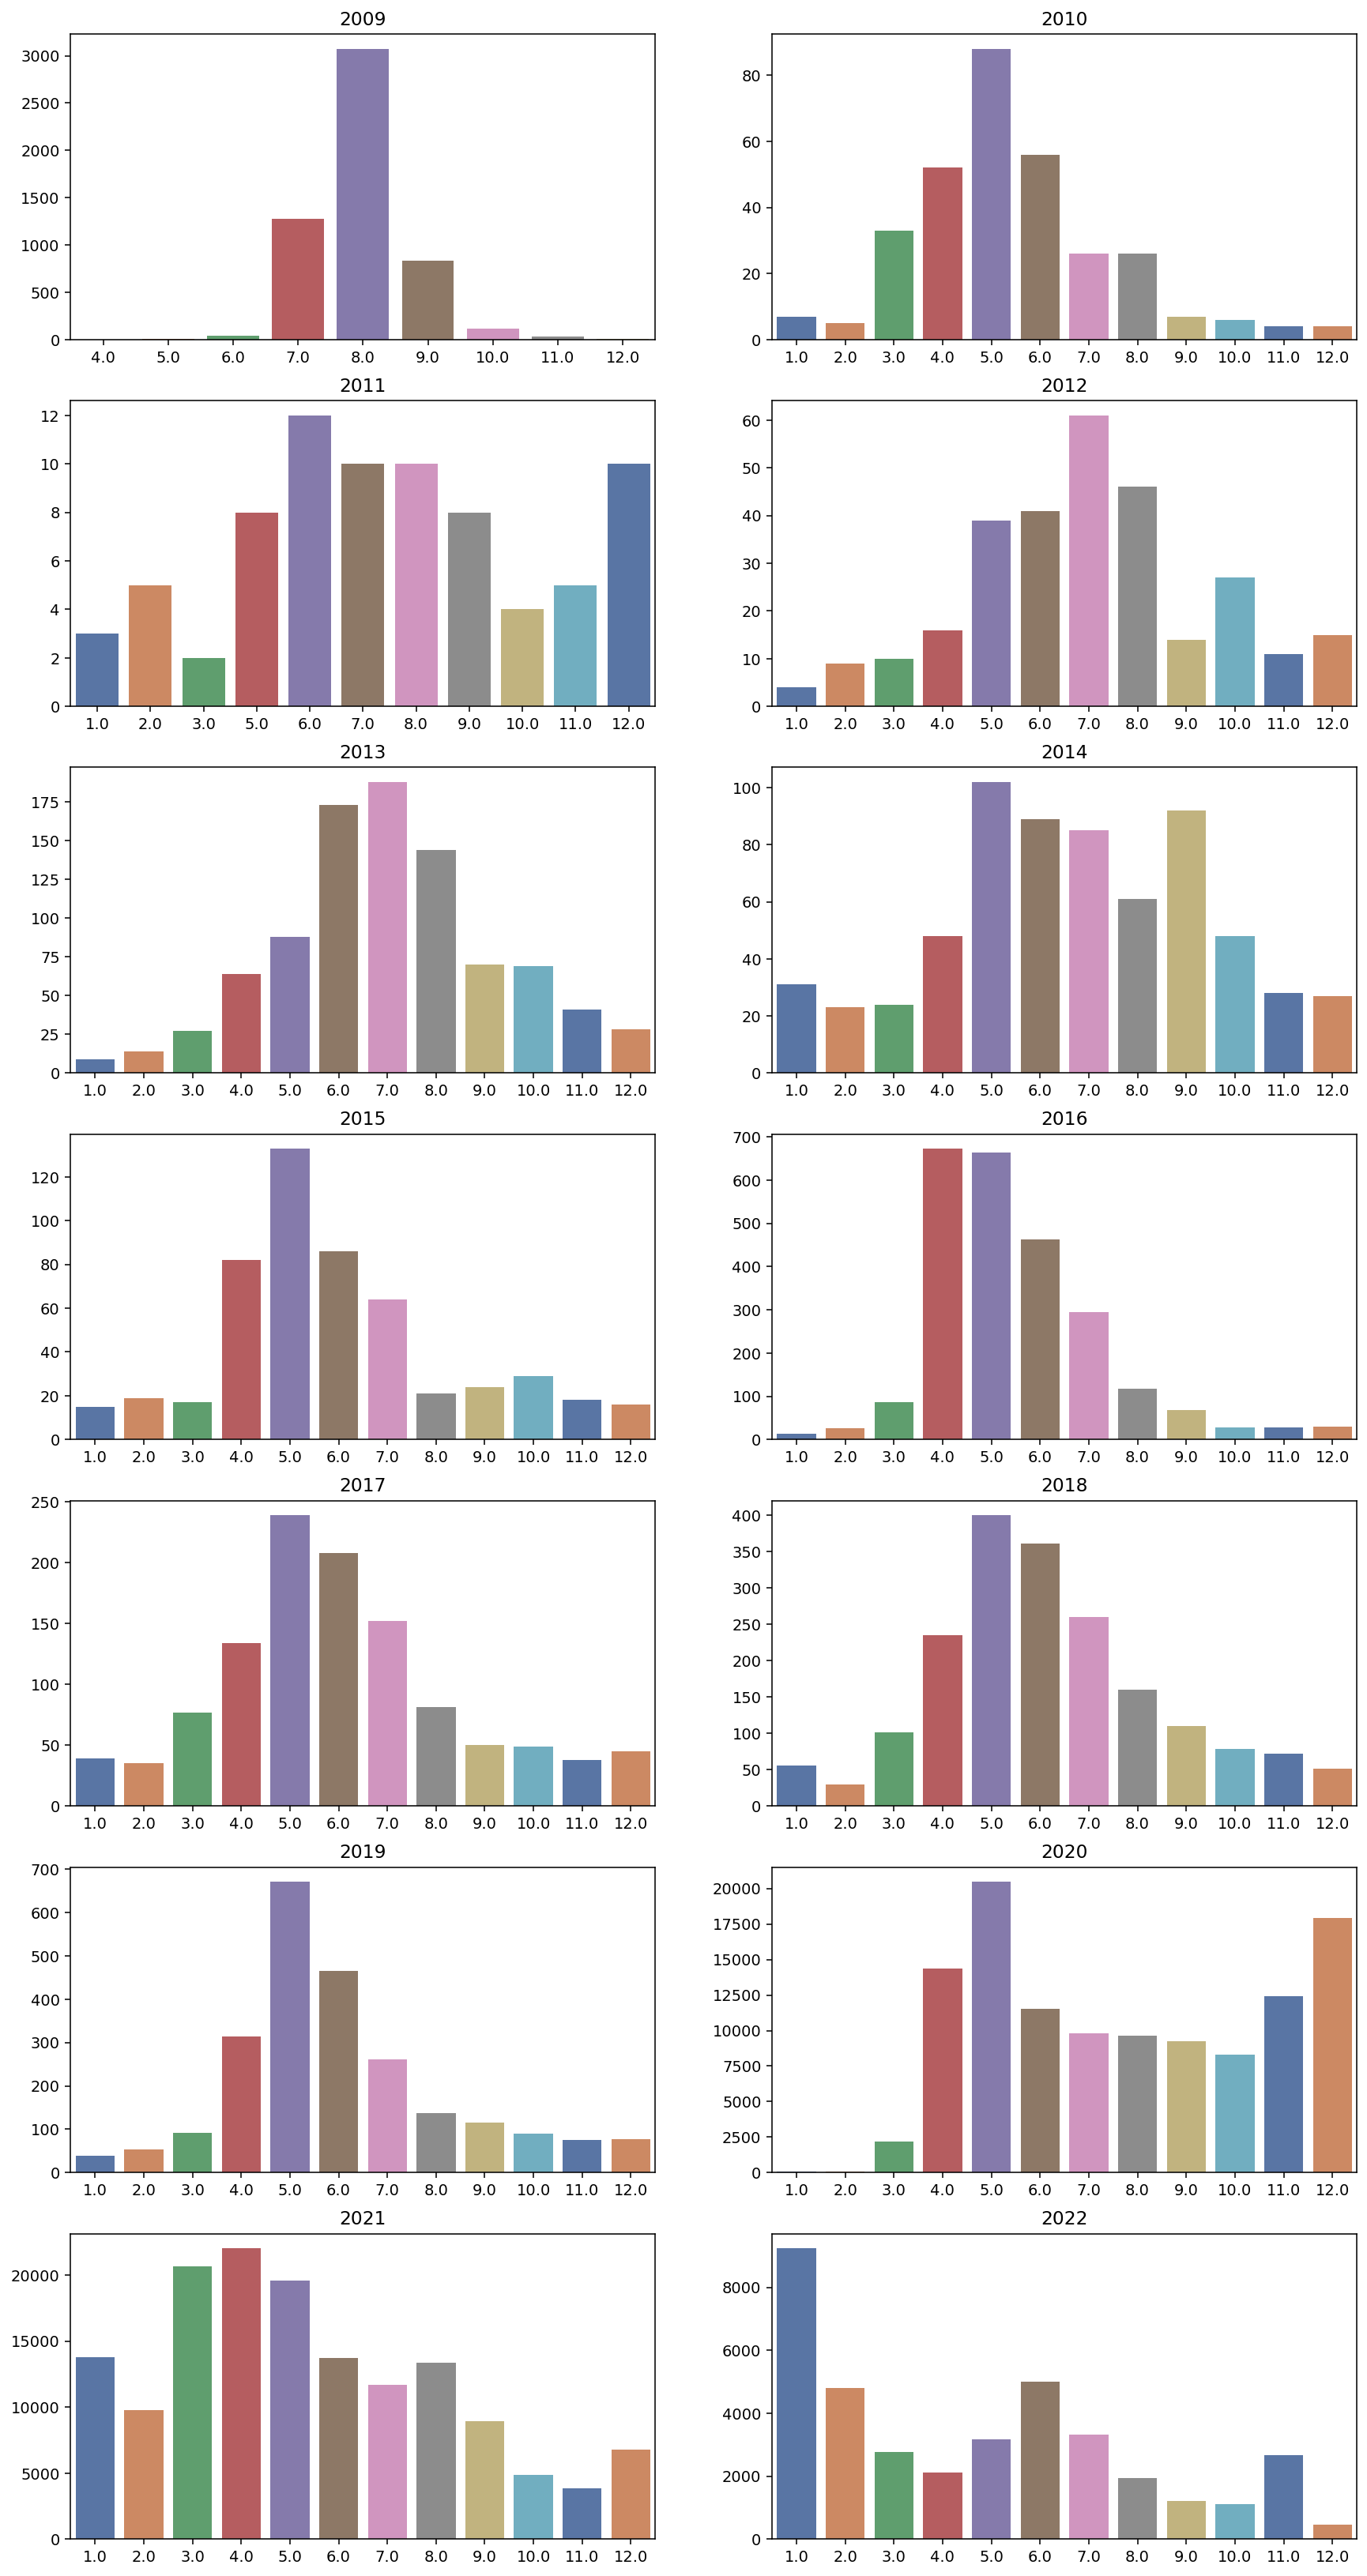

In [10]:

def CasoUFMes(data, UF):
    fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(15, 30), dpi=140)
    df_filtrado = pd.DataFrame()
    filtro = data[data['SG_UF_NOT'] == UF]#Aplica filtro por UF 
    l = 0
    c = 0
    for j in range(2009, 2023):
        filtro2 = filtro[filtro['ANO'] == j]#Aplica filtro por ANO 
        QtD_CASOS_UF_MES = filtro2.groupby(['ANO','MES'])['MES'].count()#Realiza o agrupamento p/ANO e MES 
        QtD_CASOS_UF_MES =  QtD_CASOS_UF_MES.unstack()#Desempilha os dados 
        y_values = QtD_CASOS_UF_MES.values
        y_values = np.squeeze(y_values)#Remove as dimensões de tamanho de uma matriz para fazer a plotagem 
        x_values = list(QtD_CASOS_UF_MES.columns.values)
        #Se a linha e a coluna forem menores que o limite realiza a plotagem 
        if (l < 7 and c < 2):
            #Plotando a quantidade de casos registrados mensalmente por UF ao longo dos anos 
            sns.barplot(x = x_values, y = y_values , ax = axes[l,c], palette="deep"); axes[l,c].set_title(j)
            c = c + 1
        if (c > 1):
            c = 0
            l = l + 1
            
        df_filtrado = df_filtrado.append(QtD_CASOS_UF_MES)
    display(df_filtrado)



print("UFs disponíveis: ")
print(UF_DISP)
UF = input('Entre com a sigla da UF em maiusculo para realizar filtragem e gráficos:')

while (UF not in UF_DISP):
    UF = input('Entre com a sigla da UF válida:')

CasoUFMes(df_at, UF)


# Quantidade de casos classificados por mês ao longo dos anos 
* Observação:
<br>1 - SRAG Influenza
<br>2 - SRAG por outro vírus respiratório
<br>3 - SRAG por outro agente etiológico
<br>4 - SRAG não especificado
<br>5 - SRAG por COVID-19
<br>9 - SRAG Ignorado 

In [11]:
def CasoCLMes(data, UF):
    filtro = data[data['SG_UF_NOT'] == UF]#Aplica filtro por UF 
    for j in range(2009, 2023):
        filtro2 = filtro[filtro['ANO'] == j]#Aplica filtro por ANO 
        dados_f = filtro2[['ANO','CLASSI_FIN','MES']]
        QtD_CASOS_CL_MES = dados_f.groupby(['ANO','MES','CLASSI_FIN'])['CLASSI_FIN'].count()#Realiza o agrupamento p/ANO e MES 
        QtD_CASOS_CL_MES =  QtD_CASOS_CL_MES.unstack()#Desempilha os dados 
        display(QtD_CASOS_CL_MES)

In [12]:
print("UFs disponíveis: ")
print(UF_DISP)
UF = input('Entre com a sigla da UF em maiusculo para analisar o numero de casos divididos por classificação ao longo dos anos:')

while (UF not in UF_DISP):
    UF = input('Entre com a sigla da UF válida:')

CasoCLMes(df_at, UF)

UFs disponíveis: 
['RO', 'MS', 'MG', 'SP', 'AC', 'AM', 'RN', 'DF', 'PA', 'RR', 'MT', 'PI', 'BA', 'RJ', 'GO', 'AP', 'TO', 'PR', 'MA', 'CE', 'PB', 'PE', 'AL', 'SE', 'ES', 'RS', 'SC']
Entre com a sigla da UF em maiusculo para analisar o numero de casos divididos por classificação ao longo dos anos:RJ


CLASSI_FIN      1.0   2.0     3.0
ANO    MES                       
2009.0 4.0      NaN   NaN     1.0
       5.0      NaN   NaN     7.0
       6.0     18.0   6.0    20.0
       7.0    775.0  30.0   450.0
       8.0   1504.0  55.0  1414.0
       9.0    393.0   7.0   423.0
       10.0    60.0   NaN    52.0
       11.0    18.0   NaN    16.0
       12.0     7.0   NaN     3.0

CLASSI_FIN   1.0  2.0   3.0
ANO    MES                 
2010.0 1.0   NaN  1.0   6.0
       2.0   NaN  NaN   5.0
       3.0   2.0  NaN  27.0
       4.0   1.0  1.0  33.0
       5.0   NaN  2.0  73.0
       6.0   1.0  NaN  44.0
       7.0   1.0  1.0  20.0
       8.0   NaN  3.0  20.0
       9.0   NaN  1.0   5.0
       10.0  NaN  NaN   5.0
       11.0  1.0  NaN   3.0
       12.0  NaN  NaN   2.0

CLASSI_FIN   1.0  2.0   3.0
ANO    MES                 
2011.0 1.0   NaN  NaN   3.0
       2.0   NaN  NaN   5.0
       3.0   NaN  NaN   2.0
       5.0   NaN  NaN   8.0
       6.0   NaN  2.0   9.0
       7.0   NaN  NaN  10.0
       8.0   NaN  1.0   8.0
       9.0   1.0  NaN   7.0
       10.0  1.0  NaN   2.0
       11.0  1.0  NaN   4.0
       12.0  3.0  2.0   5.0

CLASSI_FIN   1.0  2.0   3.0   4.0
ANO    MES                       
2012.0 1.0   1.0  NaN   3.0   NaN
       2.0   2.0  NaN   7.0   NaN
       3.0   NaN  NaN  10.0   NaN
       4.0   1.0  NaN  15.0   NaN
       5.0   4.0  NaN  35.0   NaN
       6.0   5.0  1.0  35.0   NaN
       7.0   9.0  NaN  51.0   1.0
       8.0   2.0  1.0  33.0   8.0
       9.0   NaN  NaN   3.0  11.0
       10.0  2.0  2.0   1.0  22.0
       11.0  NaN  NaN   1.0  10.0
       12.0  3.0  NaN   NaN  12.0

CLASSI_FIN    1.0  2.0  3.0    4.0  9.0
ANO    MES                             
2013.0 1.0    NaN  1.0  NaN    8.0  NaN
       2.0    2.0  2.0  NaN   10.0  NaN
       3.0    6.0  2.0  1.0   18.0  NaN
       4.0   24.0  3.0  1.0   36.0  NaN
       5.0   12.0  9.0  1.0   66.0  NaN
       6.0   13.0  4.0  2.0  151.0  NaN
       7.0   26.0  7.0  5.0  146.0  1.0
       8.0   15.0  2.0  2.0  118.0  2.0
       9.0    6.0  NaN  NaN   60.0  2.0
       10.0   7.0  1.0  NaN   57.0  3.0
       11.0   2.0  NaN  3.0   34.0  1.0
       12.0   NaN  NaN  2.0   21.0  NaN

CLASSI_FIN    1.0   2.0  3.0   4.0  9.0
ANO    MES                             
2014.0 1.0    4.0   NaN  NaN  24.0  1.0
       2.0    1.0   NaN  NaN  20.0  2.0
       3.0    1.0   NaN  NaN  23.0  NaN
       4.0    4.0   8.0  1.0  32.0  2.0
       5.0    NaN  49.0  2.0  44.0  4.0
       6.0    2.0  53.0  2.0  27.0  3.0
       7.0    2.0  35.0  1.0  46.0  1.0
       8.0   12.0   3.0  1.0  40.0  4.0
       9.0   20.0   9.0  4.0  51.0  1.0
       10.0   4.0   3.0  1.0  36.0  4.0
       11.0   2.0   2.0  3.0  19.0  2.0
       12.0   1.0   7.0  NaN  19.0  NaN

CLASSI_FIN    1.0   2.0  3.0   4.0  9.0
ANO    MES                             
2015.0 1.0    NaN   1.0  1.0  13.0  NaN
       2.0    NaN   3.0  1.0  15.0  NaN
       3.0    NaN  11.0  NaN   5.0  1.0
       4.0    1.0  58.0  4.0  17.0  2.0
       5.0   10.0  66.0  2.0  52.0  1.0
       6.0    5.0  50.0  NaN  31.0  NaN
       7.0    2.0  16.0  4.0  40.0  2.0
       8.0    2.0   1.0  NaN  17.0  NaN
       9.0    3.0   5.0  1.0  15.0  NaN
       10.0   1.0   4.0  NaN  21.0  2.0
       11.0   1.0   1.0  NaN  15.0  NaN
       12.0   1.0   NaN  NaN  15.0  NaN

CLASSI_FIN     1.0   2.0  3.0    4.0   9.0
ANO    MES                                
2016.0 1.0     1.0   NaN  1.0   11.0   NaN
       2.0     4.0   1.0  1.0   19.0   NaN
       3.0    17.0   2.0  NaN   67.0   NaN
       4.0   142.0  43.0  4.0  459.0   9.0
       5.0   104.0  37.0  2.0  491.0  15.0
       6.0    39.0  36.0  3.0  354.0  14.0
       7.0    13.0  19.0  4.0  232.0  10.0
       8.0    12.0   2.0  2.0   90.0   3.0
       9.0     4.0   2.0  NaN   56.0   3.0
       10.0    1.0   NaN  NaN   24.0   NaN
       11.0    2.0   1.0  1.0   19.0   2.0
       12.0    5.0   1.0  NaN   23.0   NaN

CLASSI_FIN    1.0   2.0   3.0    4.0  9.0
ANO    MES                               
2017.0 1.0   10.0   1.0   1.0   27.0  NaN
       2.0    3.0   3.0   NaN   25.0  2.0
       3.0   12.0  15.0   4.0   42.0  3.0
       4.0   20.0  40.0   1.0   67.0  2.0
       5.0   14.0  91.0  11.0  117.0  3.0
       6.0   12.0  56.0   9.0  119.0  3.0
       7.0   11.0  33.0   3.0   96.0  3.0
       8.0    1.0  21.0   2.0   53.0  NaN
       9.0    2.0   8.0   1.0   35.0  2.0
       10.0   6.0   8.0   1.0   32.0  1.0
       11.0   7.0   4.0   2.0   25.0  NaN
       12.0   8.0   7.0   3.0   24.0  1.0

CLASSI_FIN    1.0    2.0   3.0    4.0   9.0
ANO    MES                                 
2018.0 1.0   15.0   10.0   1.0   30.0   NaN
       2.0    6.0    2.0   1.0   20.0   1.0
       3.0   30.0   21.0   NaN   50.0   NaN
       4.0   27.0   65.0   2.0  135.0   5.0
       5.0   43.0  114.0   2.0  223.0  10.0
       6.0   52.0  133.0  10.0  157.0   6.0
       7.0   45.0   85.0   5.0  117.0   2.0
       8.0    4.0   42.0   4.0  103.0   5.0
       9.0    5.0   23.0   2.0   72.0   4.0
       10.0   4.0   21.0   3.0   48.0   1.0
       11.0   3.0   15.0   6.0   44.0   1.0
       12.0   NaN   10.0   2.0   31.0   3.0

CLASSI_FIN     1.0    2.0  3.0    4.0
ANO    MES                           
2019.0 1.0     3.0    8.0  2.0   25.0
       2.0     1.0    7.0  1.0   45.0
       3.0     3.0   27.0  NaN   60.0
       4.0    43.0  140.0  NaN  129.0
       5.0   128.0  230.0  4.0  301.0
       6.0    64.0  116.0  3.0  274.0
       7.0    23.0   54.0  NaN  180.0
       8.0    11.0   13.0  1.0  108.0
       9.0     4.0   15.0  NaN   94.0
       10.0    6.0   13.0  NaN   69.0
       11.0    5.0   16.0  NaN   48.0
       12.0   23.0   18.0  NaN   29.0

CLASSI_FIN    1.0   2.0   3.0     4.0      5.0
ANO    MES                                    
2020.0 1.0   20.0   6.0   NaN    42.0      NaN
       2.0    7.0   8.0   NaN    40.0      1.0
       3.0   20.0  32.0   3.0  1302.0    763.0
       4.0    8.0   7.0   8.0  3556.0  10095.0
       5.0    6.0   8.0  22.0  4230.0  15448.0
       6.0    2.0   9.0  10.0  3863.0   7267.0
       7.0    7.0   6.0  13.0  3559.0   5754.0
       8.0    6.0  10.0   9.0  3253.0   5936.0
       9.0    4.0  15.0   8.0  2749.0   5991.0
       10.0   6.0  34.0  15.0  2705.0   5235.0
       11.0  11.0  69.0  29.0  2997.0   8940.0
       12.0   2.0  47.0  21.0  3620.0  13604.0

CLASSI_FIN    1.0  2.0  3.0   4.0    5.0
ANO    MES                              
2021.0 1.0      6  133   21  3507   9345
       2.0      6  129   14  2467   6588
       3.0     10  101   25  3336  16495
       4.0     20   44   20  3033  17997
       5.0     15   34   15  2969  15595
       6.0     11   21   12  2800  10307
       7.0     15   36   18  2913   8247
       8.0      9   33   21  2859   9897
       9.0      7   68   13  2240   6186
       10.0    14   83   25  2418   2135
       11.0   121  125   19  2337   1039
       12.0  2645   69   27  2886    619

CLASSI_FIN     1.0    2.0   3.0     4.0     5.0
ANO    MES                                     
2022.0 1.0   373.0   34.0  45.0  2008.0  6502.0
       2.0    29.0   31.0  18.0  1727.0  2844.0
       3.0    22.0  134.0  19.0  1755.0   724.0
       4.0    15.0  333.0   9.0  1352.0   367.0
       5.0    13.0  453.0  14.0  1830.0   763.0
       6.0    17.0  207.0  21.0  1781.0  2785.0
       7.0    13.0   74.0  15.0  1418.0  1619.0
       8.0    15.0   45.0  11.0  1322.0   459.0
       9.0    12.0   35.0  10.0   934.0   145.0
       10.0   36.0   29.0   3.0   769.0   162.0
       11.0   53.0   40.0   9.0   622.0  1325.0
       12.0    NaN    NaN   1.0    84.0   168.0

# Total de casos divididos por classificação
* Observação:
<br>1 - SRAG Influenza
<br>2 - SRAG por outro vírus respiratório
<br>3 - SRAG por outro agente etiológico
<br>4 - SRAG não especificado
<br>5 - SRAG por COVID-19
<br>9 - SRAG Ignorado 

Total de casos
 5.0    2140041
4.0    1219673
1.0     126462
2.0      94332
3.0      68884
9.0       1222
Name: CLASSI_FIN, dtype: int64


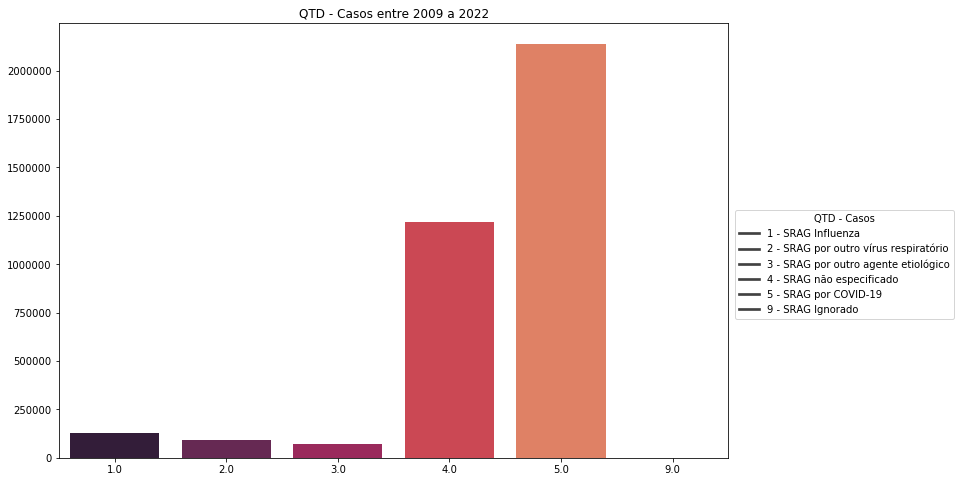

In [13]:
casos_class = df_at['CLASSI_FIN'].value_counts()
print("Total de casos\n", casos_class)
x = list(casos_class.index)
y = list(casos_class.values)
lb = ['1 - SRAG Influenza','2 - SRAG por outro vírus respiratório','3 - SRAG por outro agente etiológico',
          '4 - SRAG não especificado','5 - SRAG por COVID-19','9 - SRAG Ignorado']

plt.figure(figsize=(12, 8))
plt.title("QTD - Casos entre 2009 a 2022")

sns.barplot(x = x, y = y, palette = 'rocket')
plt.legend(title='QTD - Casos', loc = (1.01, 0.32),  labels = lb)
plt.show()

# Casos acumulados nacionalmente por semana de notificação agrupados por ano 

SEM_NOT,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
ANO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11,18,20,12,12,13,17,71,283,545,317,818,2556,5510,10697,11019,8387,7490,7555,5505,5484,4291,3492,2588,1833,1650,1535,1187,998,704,718,775,691,549,436.0,294,NaN
2010.0,306.0,235.0,161.0,173.0,176.0,179.0,159.0,288.0,386.0,566.0,658.0,643.0,508.0,529.0,617.0,478,382,384,362,344,312,258,262,246,262,215,191,176,174,155,178,141,120,168,119,94,107,83,100,70,46,67,54,50,40,28,41,48,36,46,38.0,83,NaN
2011.0,35.0,35.0,30.0,22.0,26.0,24.0,36.0,39.0,30.0,37.0,51.0,45.0,36.0,47.0,48.0,48,57,69,82,78,68,66,99,162,229,219,186,192,183,170,153,121,132,129,96,97,112,91,95,71,63,75,87,63,84,70,56,85,57,66,65.0,58,NaN
2012.0,87.0,57.0,73.0,47.0,74.0,64.0,90.0,69.0,109.0,121.0,137.0,155.0,172.0,145.0,168.0,194,190,154,241,312,437,548,546,807,1156,1394,1735,1608,1625,1525,1132,882,743,563,489,381,396,345,288,254,193,184,175,141,143,103,132,125,124,106,108.0,62,NaN
2013.0,132.0,108.0,101.0,107.0,135.0,104.0,118.0,137.0,163.0,154.0,205.0,200.0,184.0,288.0,373.0,531,777,977,1144,1184,1528,1580,1923,1970,1943,1794,1724,1701,1609,1385,1248,1279,1070,1054,945,848,755,600,501,486,437,452,391,370,331,249,271,240,188,219,184.0,134,NaN
2014.0,65.0,183.0,165.0,160.0,146.0,147.0,188.0,190.0,233.0,163.0,239.0,275.0,305.0,369.0,452.0,423,569,582,774,707,824,786,777,762,650,670,541,491,507,452,411,383,387,424,359,355,304,331,313,320,268,263,267,228,192,224,213,196,198,205,179.0,116,97.0
2015.0,81.0,125.0,140.0,146.0,121.0,149.0,164.0,201.0,199.0,220.0,291.0,318.0,272.0,380.0,417.0,330,396,516,596,669,591,478,544,494,490,502,434,446,349,314,308,301,295,281,242,238,212,191,169,194,172,177,176,141,153,150,158,141,119,117,96.0,107,14.0
2016.0,79.0,116.0,111.0,137.0,153.0,113.0,237.0,237.0,334.0,568.0,756.0,1107.0,3227.0,4072.0,4197.0,3173,3273,2789,2786,2670,1992,1980,1688,1722,1731,1607,1413,1196,1022,870,762,621,630,564,538,486,500,444,428,384,383,347,312,296,296,270,296,316,249,308,238.0,245,NaN
2017.0,265.0,222.0,195.0,223.0,215.0,267.0,354.0,388.0,311.0,461.0,460.0,572.0,691.0,690.0,709.0,914,994,1004,1139,1180,1179,1190,1136,945,1071,951,875,846,718,584,560,542,500,474,517,326,497,414,418,409,355,453,467,327,389,339,304,323,310,315,285.0,223,NaN


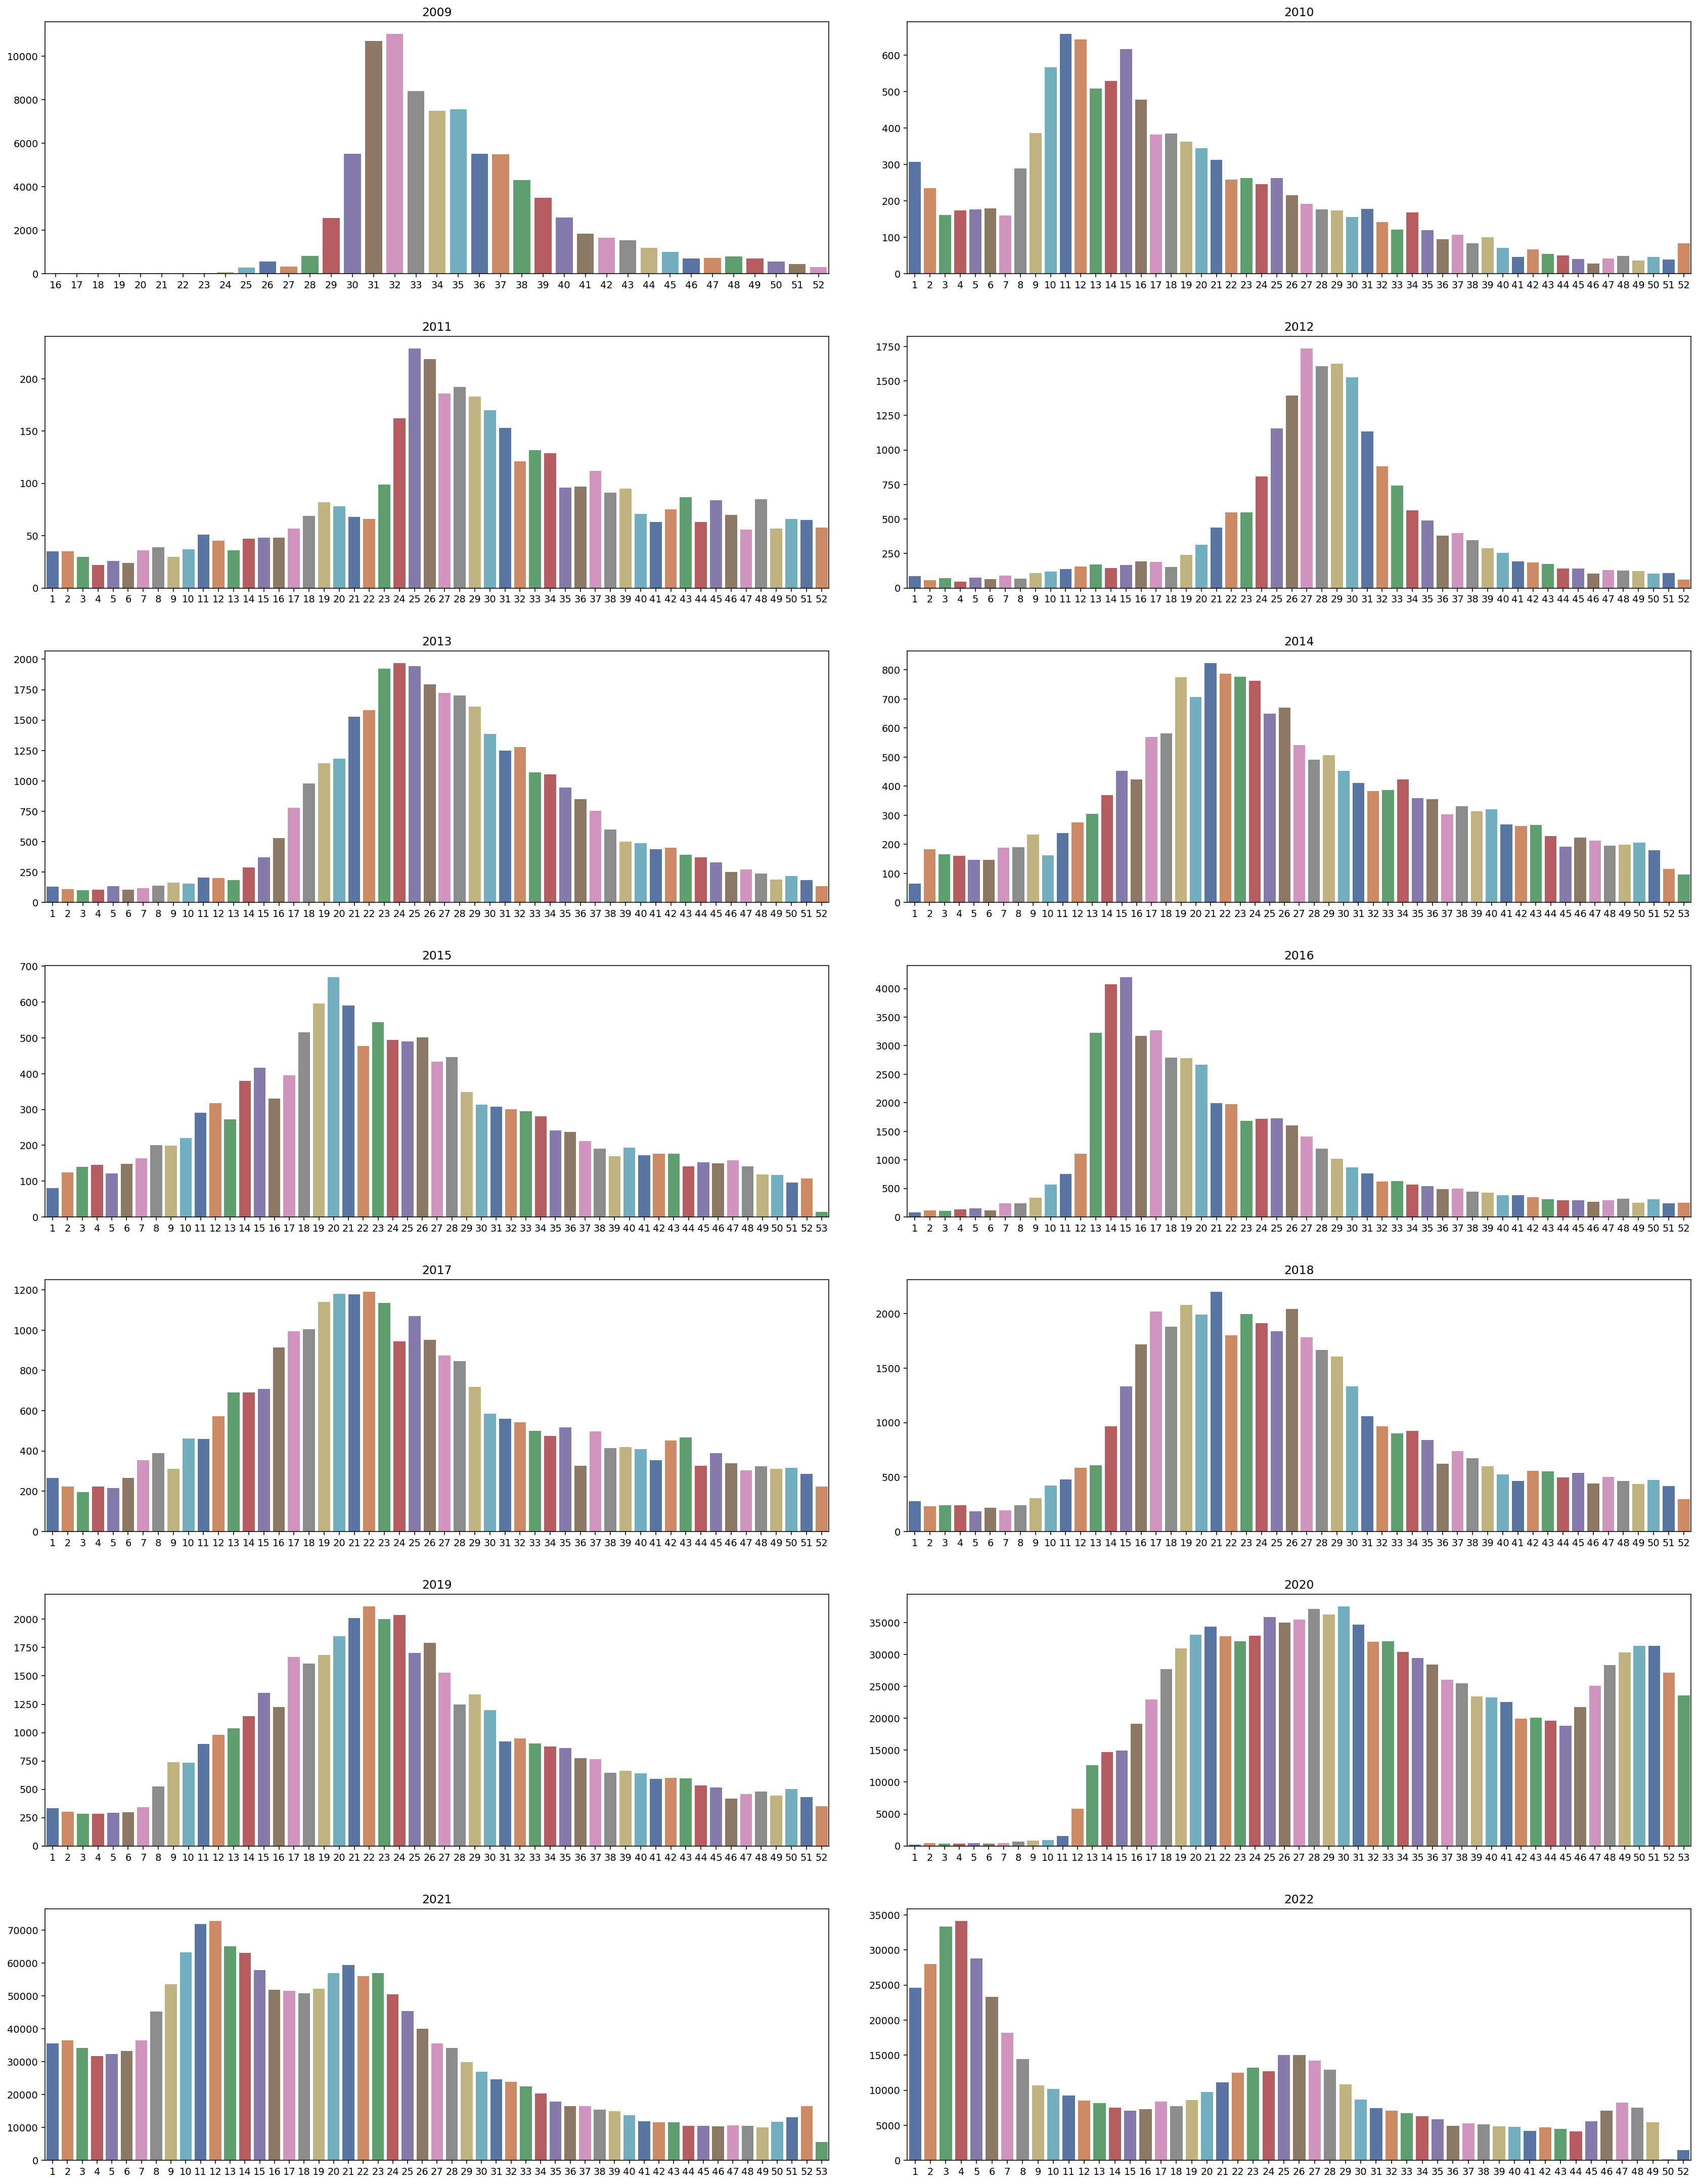

In [14]:
def CasoAGPSemana(data):
    fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(30, 40), dpi=140)
    df_filtrado = pd.DataFrame()
    l = 0
    c = 0
    for j in range(2009, 2023):
        filtro2 = data[data['ANO'] == j]
        QtD_CASOS_SEM = filtro2.groupby(['ANO','SEM_NOT'])['SEM_NOT'].count()#Realiza o agrupamento p/ANO e Semana de Notificação
        QtD_CASOS_SEM = QtD_CASOS_SEM.unstack()#Desempilha os dados 
        y_values = QtD_CASOS_SEM.values
        y_values = np.squeeze(y_values)#Remove as dimensões de tamanho de uma matriz para fazer a plotagem 
        x_values = list(QtD_CASOS_SEM.columns.values)
        #Se a linha e a coluna forem menores que o limite realiza a plotagem 
        if (l < 7 and c < 2):
            #Plotando a quantidade de casos registrados por semana ao longo dos anos 
            sns.barplot(x = x_values, y = y_values , ax = axes[l,c], palette="deep"); axes[l,c].set_title(j)
            plt.subplots_adjust(wspace=0.1, hspace=0.25)
            c = c + 1
        if (c > 1):
            c = 0
            l = l + 1
            
        df_filtrado = df_filtrado.append(QtD_CASOS_SEM)
    display(df_filtrado)

CasoAGPSemana(df_at)

# Casos por semana de notificação agrupados por UF da unidade de notificação  ao longo dos anos 

UFs disponíveis: 
['RO', 'MS', 'MG', 'SP', 'AC', 'AM', 'RN', 'DF', 'PA', 'RR', 'MT', 'PI', 'BA', 'RJ', 'GO', 'AP', 'TO', 'PR', 'MA', 'CE', 'PB', 'PE', 'AL', 'SE', 'ES', 'RS', 'SC']
Entre com a sigla da UF em maiusculo para realizar filtragem e gráficos:RJ


SEM_NOT,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
ANO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,2,2,1,NaN,5,20,40,42,132.0,389,760,1037,886.0,604,385,341,215,170,142,70.0,41,25,20.0,14.0,11.0,10,6.0,6,5,1.0,3,1.0,1,NaN
2010.0,1.0,2.0,3.0,1.0,NaN,3.0,2.0,NaN,4.0,9.0,7.0,10.0,6.0,12.0,13.0,8.0,16.0,29.0,14,14,23,16,16.0,13,13,9,7,5.0,9,2,7,8.0,2,6,3,4,1,1,3.0,1,3,NaN,NaN,NaN,1,NaN,2,1,NaN,2,1.0,1,NaN
2011.0,2.0,1.0,NaN,NaN,1.0,2.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3,2,1,1,1.0,3,2,9,3,NaN,2,2,1,NaN,1,6,2,1,4,3,NaN,1,2,1.0,NaN,NaN,1,1.0,2,3,1.0,3,3.0,1,NaN
2012.0,2.0,NaN,1.0,1.0,4.0,NaN,2.0,3.0,NaN,2.0,1.0,2.0,5.0,4.0,2.0,1.0,9.0,3.0,8,7,14,8,12.0,11,14,3,11,14.0,17,16,12,13.0,12,8,4,5,6,3,NaN,5,4,5.0,11.0,2.0,3,3.0,2,3,3.0,6,5.0,1,NaN
2013.0,1.0,1.0,2.0,1.0,7.0,6.0,NaN,3.0,4.0,5.0,3.0,8.0,10.0,8.0,16.0,13.0,18.0,18.0,15,22,20,22,40.0,52,40,39,32,45.0,47,43,37,29.0,32,38,31,20,22,10,17.0,12,18,10.0,15.0,17.0,10,11.0,6,12,10.0,6,6.0,5,NaN
2014.0,2.0,3.0,10.0,9.0,7.0,2.0,8.0,7.0,6.0,3.0,8.0,5.0,3.0,9.0,15.0,10.0,10.0,11.0,21,18,26,35,20.0,21,23,21,23,10.0,24,18,16,12.0,14,16,17,18,15,27,19.0,23,10,8.0,8.0,12.0,6,10.0,3,9,9.0,7,6.0,3,2.0
2015.0,3.0,5.0,3.0,3.0,6.0,6.0,2.0,5.0,2.0,1.0,2.0,7.0,8.0,21.0,16.0,12.0,30.0,18.0,45,44,26,17,25.0,17,24,6,15,15.0,16,15,6,2.0,6,5,11,2,5,3,6.0,9,2,9.0,8.0,11.0,1,2.0,4,2,5.0,3,3.0,3,1.0
2016.0,5.0,1.0,2.0,4.0,5.0,4.0,9.0,7.0,3.0,6.0,4.0,21.0,73.0,148.0,181.0,148.0,177.0,159.0,142,174,133,116,104.0,104,111,94,95,78.0,53,56,45,19.0,24,14,26,17,16,10,15.0,5,6,10.0,4.0,9.0,9,8.0,3,2,3.0,5,12.0,9,NaN
2017.0,10.0,9.0,10.0,7.0,6.0,11.0,6.0,13.0,14.0,11.0,17.0,14.0,23.0,20.0,39.0,40.0,35.0,43.0,55,50,62,51,55.0,39,49,48,42,45.0,28,27,20,22.0,19,17,9,7,9,17,16.0,11,10,17.0,6.0,10.0,8,12.0,12,2,7.0,10,18.0,9,NaN


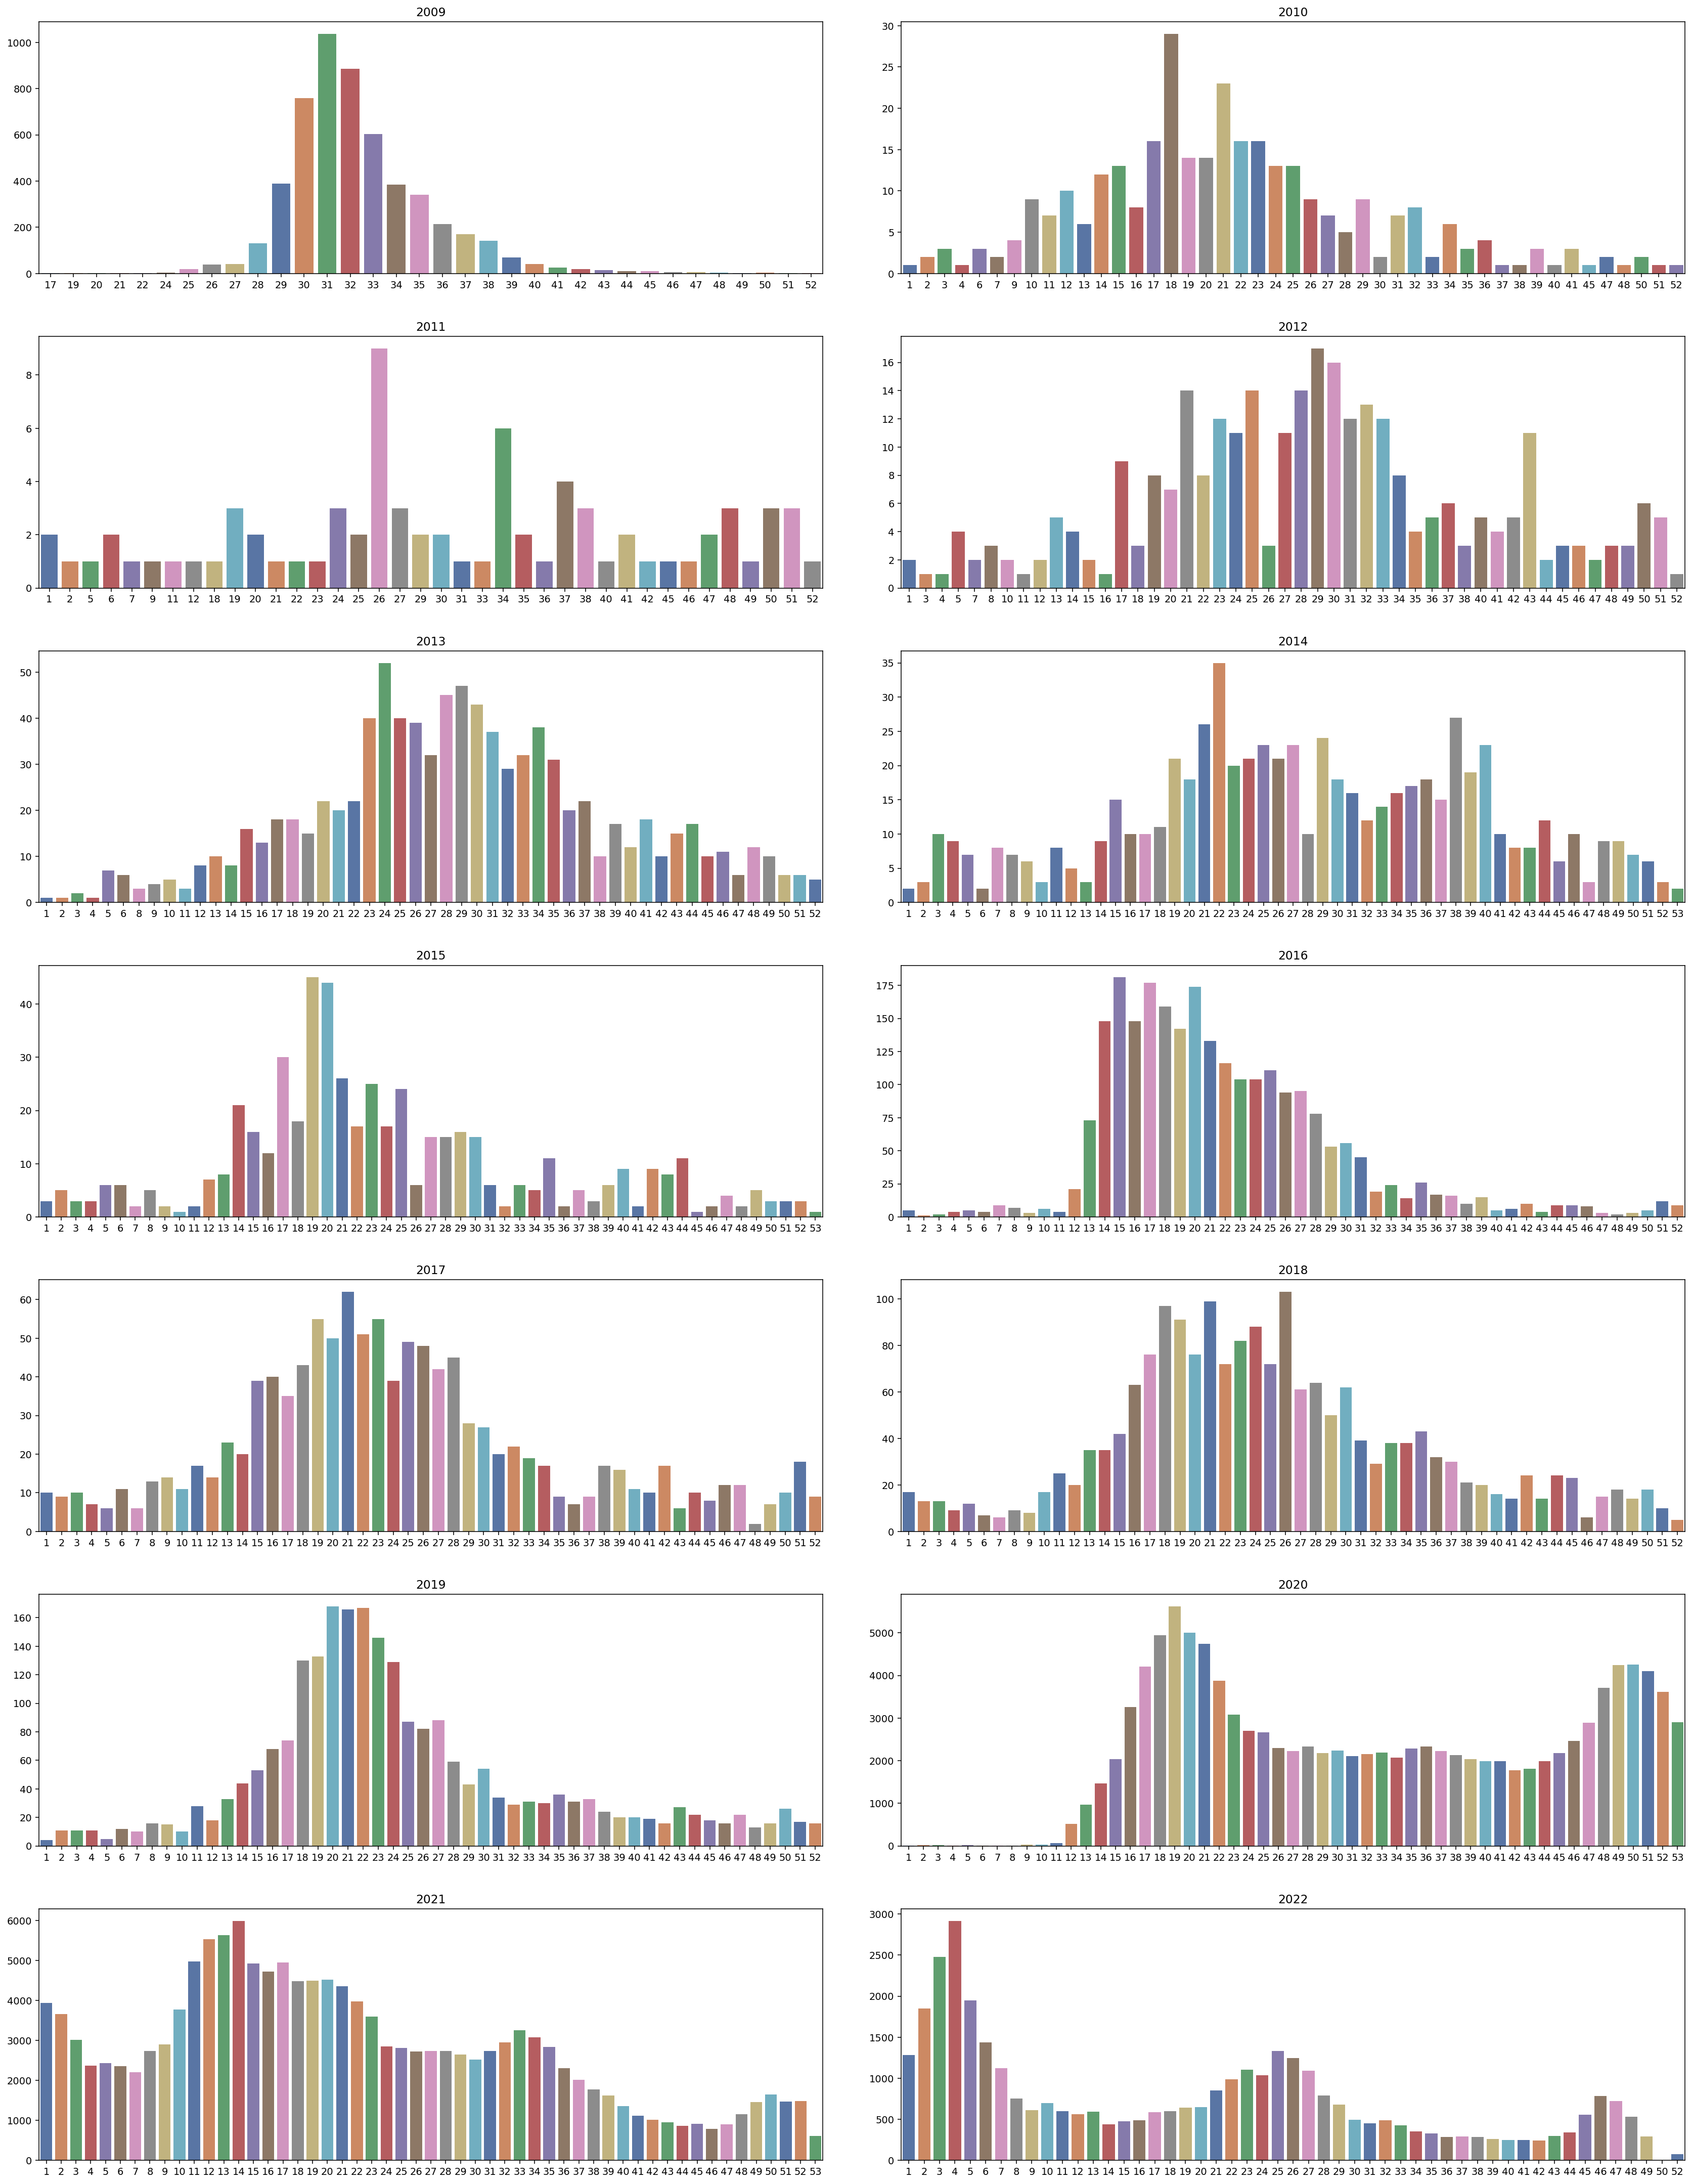

In [21]:
def CasoUFMes(data, UF):
    fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(30, 40), dpi=140)
    df_filtrado = pd.DataFrame()
    filtro = data[data['SG_UF_NOT'] == UF]#Aplica filtro por UF 
    l = 0
    c = 0
    for j in range(2009, 2023):
        filtro2 = filtro[filtro['ANO'] == j]
        QtD_CASOS_SEM = filtro2.groupby(['ANO','SEM_NOT'])['SEM_NOT'].count()#Realiza o agrupamento p/ANO e semana de notificação  
        QtD_CASOS_SEM = QtD_CASOS_SEM.unstack()#Desempilha os dados 
        y_values = QtD_CASOS_SEM.values
        y_values = np.squeeze(y_values)#Remove as dimensões de tamanho de uma matriz para fazer a plotagem 
        x_values = list(QtD_CASOS_SEM.columns.values)
        #Se a linha e a coluna forem menores que o limite realiza a plotagem 
        if (l < 7 and c < 2):
            #Plotando a quantidade de casos registrados por semana de notificação e UF ao longo dos anos 
            sns.barplot(x = x_values, y = y_values , ax = axes[l,c], palette="deep"); axes[l,c].set_title(j)
            plt.subplots_adjust(wspace=0.1, hspace=0.25)
            c = c + 1
        if (c > 1):
            c = 0
            l = l + 1
            
        df_filtrado = df_filtrado.append(QtD_CASOS_SEM)
    display(df_filtrado)



print("UFs disponíveis: ")
print(UF_DISP)
UF = input('Entre com a sigla da UF em maiusculo para realizar filtragem e gráficos:')

while (UF not in UF_DISP):
    UF = input('Entre com a sigla da UF válida:')

CasoUFMes(df_at, UF)

# Quantidade de casos acumulados ao longo dos anos divididos por sexo do paciente  
*Observações segundo o dicionário do SRAG
<br>F - Sexo feminino
<br>M - Sexo Masculino
<br>I - Ignorado

Total de casos por sexo
 M    2037147
F    1789067
I        894
Name: CS_SEXO, dtype: int64


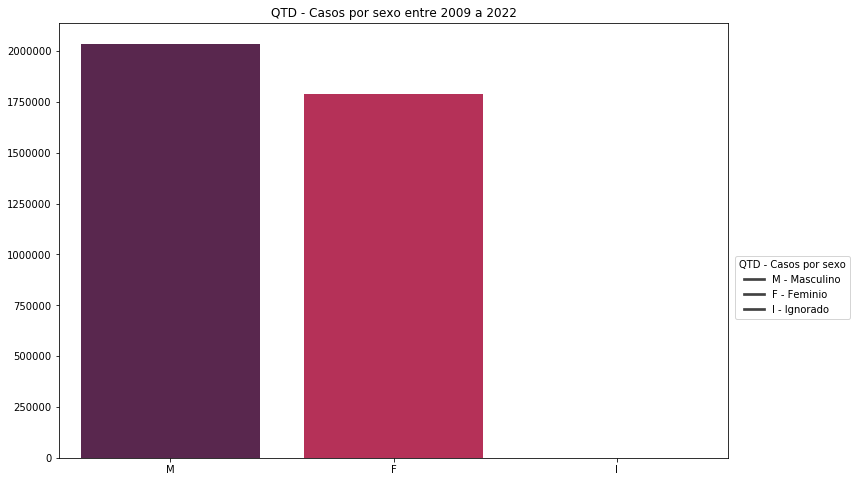

In [22]:
casos_sex = df_at['CS_SEXO'].value_counts()
print("Total de casos por sexo\n", casos_sex)
x = list(casos_sex.index)
y = list(casos_sex.values)
lb = ['M - Masculino','F - Feminio', 'I - Ignorado']

plt.figure(figsize=(12, 8))
plt.title("QTD - Casos por sexo entre 2009 a 2022")

sns.barplot(x = x, y = y, palette = 'rocket')
plt.legend(title='QTD - Casos por sexo', loc = (1.01, 0.32), labels = lb)
plt.show()


# Quantidade de casos ao longo dos anos divididos por sexo do paciente 

CS_SEXO,F,M,I
ANO,,,
2009.0,50202,37821,59
2010.0,6125,5407,10
2011.0,2179,2191,5
2012.0,10655,10448,6
2013.0,18326,18197,8
2014.0,9361,9652,15
2015.0,6943,7579,3
2016.0,27590,26665,14
2017.0,14469,15019,8


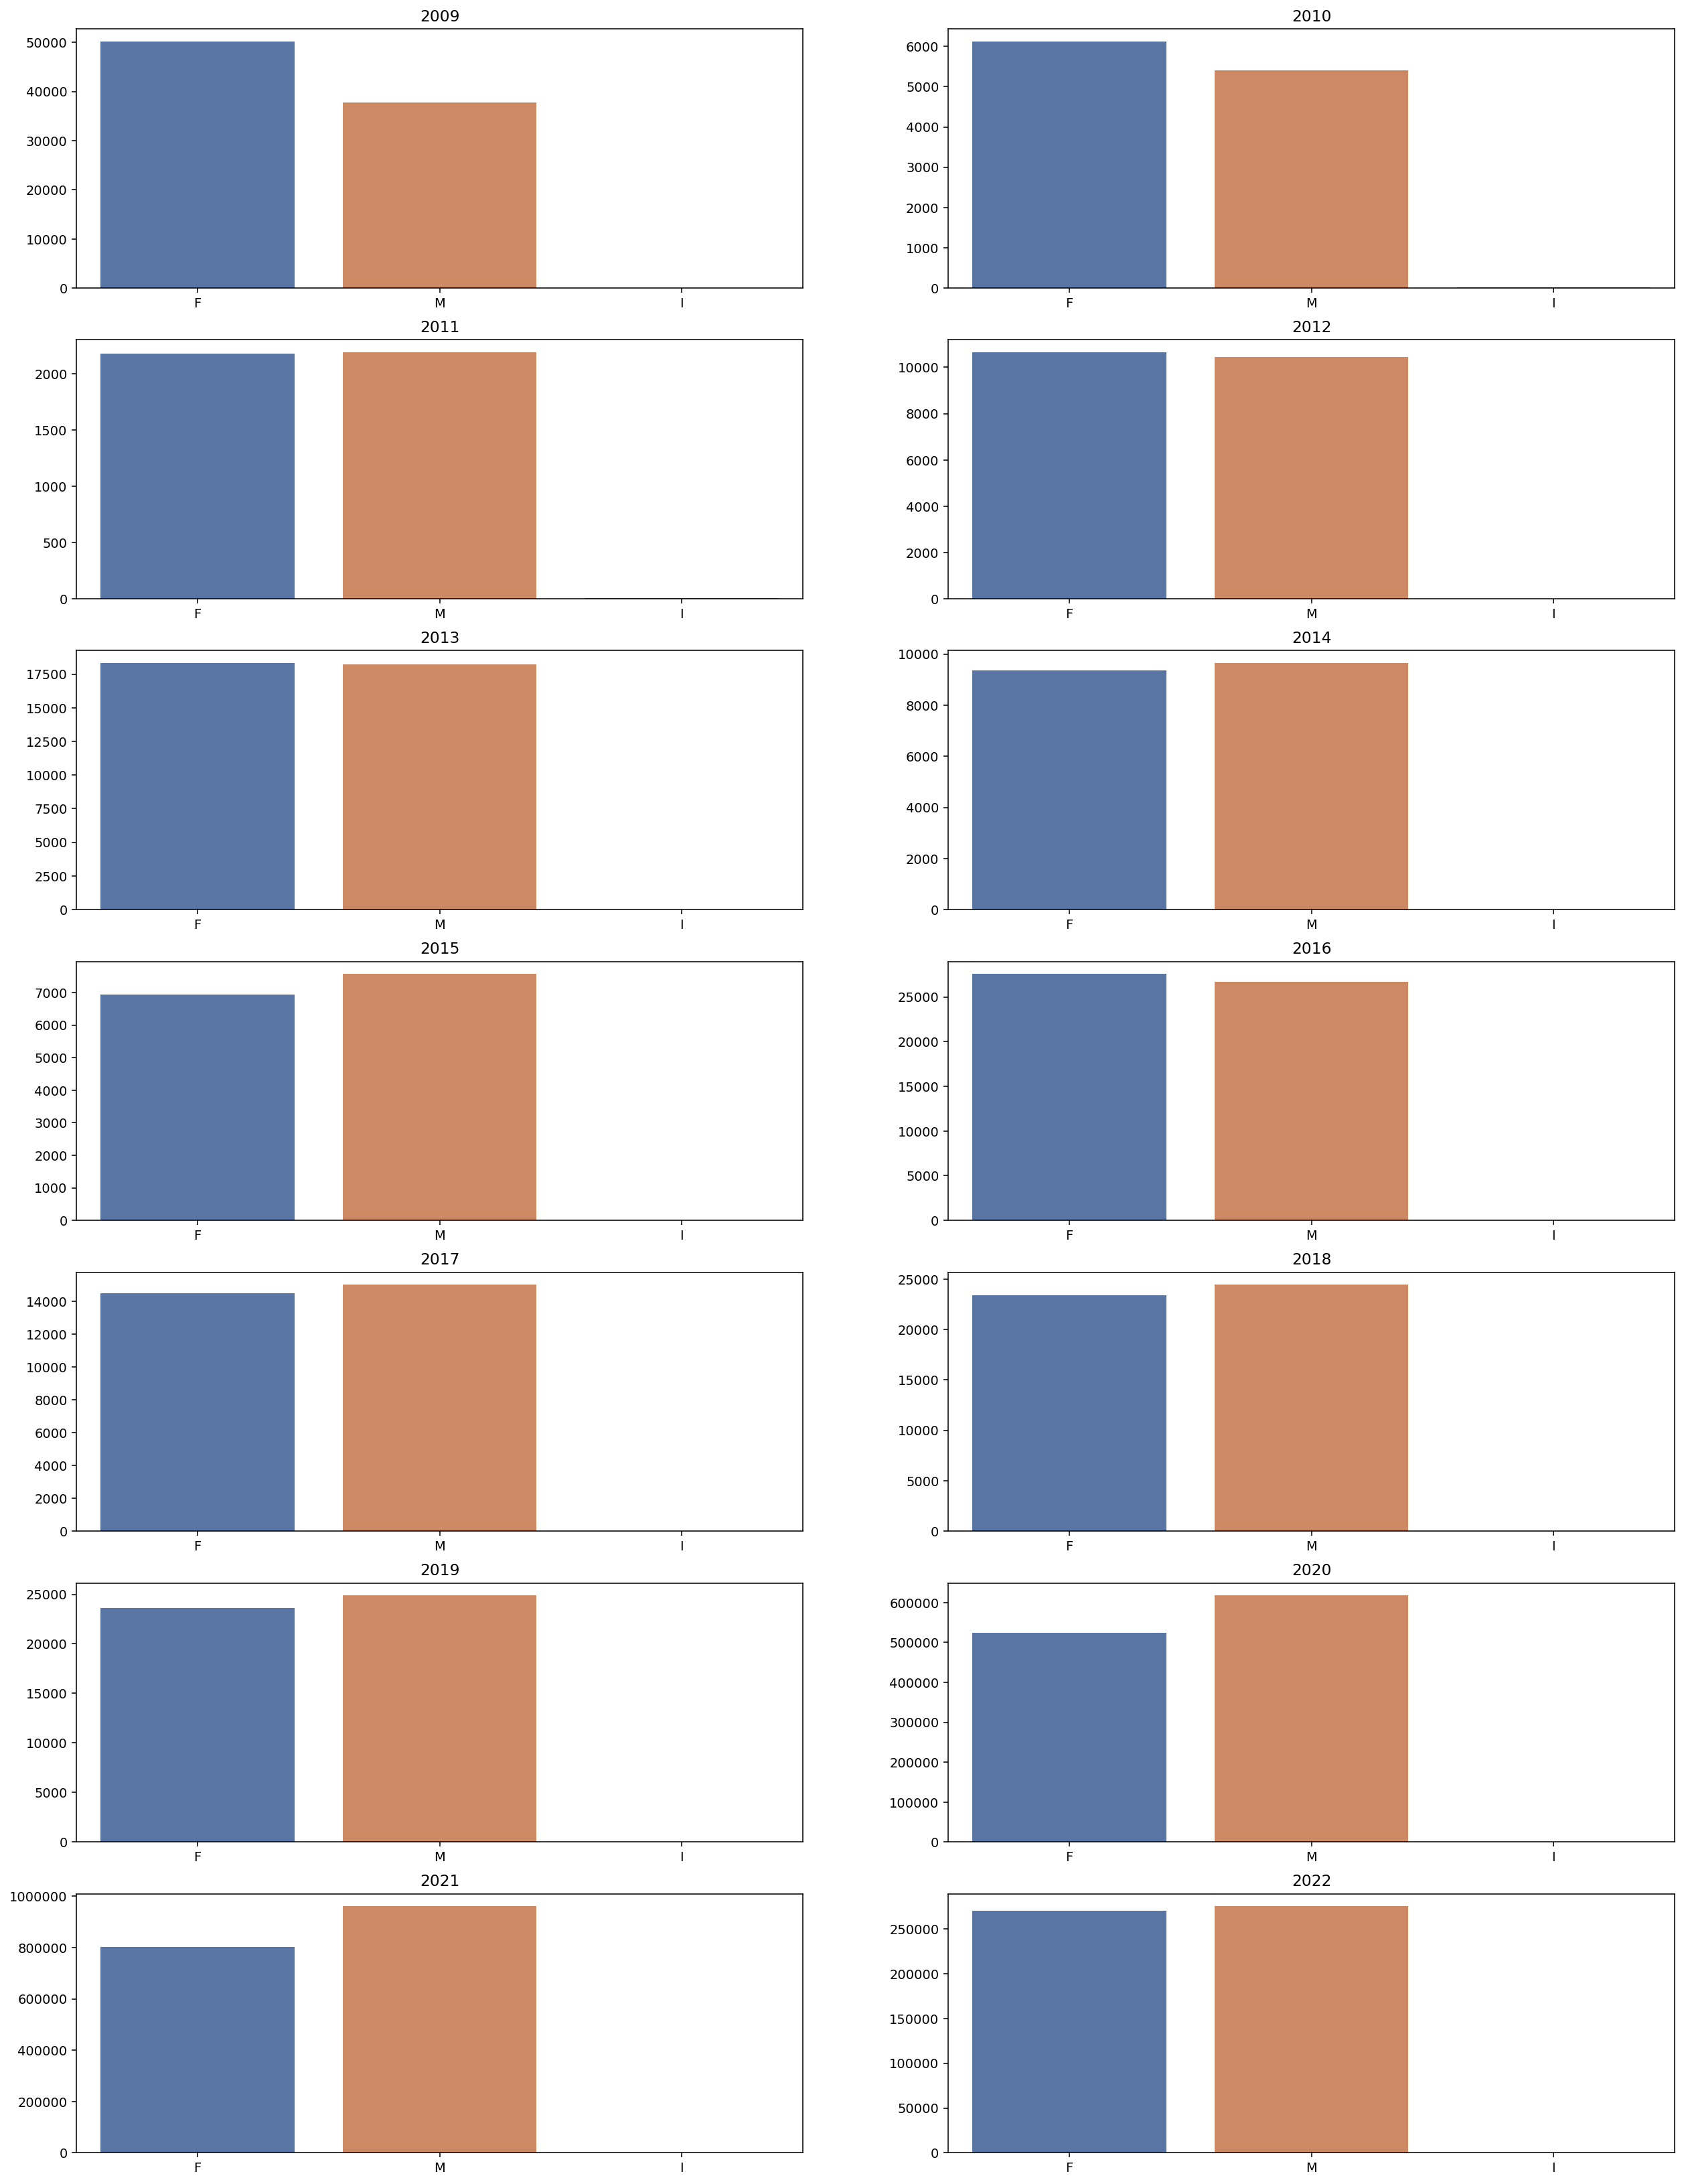

In [23]:
def CasoAGPSEX(data):
    fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(22, 30), dpi=140)
    df_filtrado = pd.DataFrame()
    l = 0
    c = 0
    for j in range(2009, 2023):
        filtro2 = data[data['ANO'] == j]
        QtD_CASOS_SEX = filtro2.groupby(['ANO','CS_SEXO'])['CS_SEXO'].count() #Realiza o agrupamento p/ANO e sexo do paciente
        QtD_CASOS_SEX = QtD_CASOS_SEX.unstack()#Desempilha os dados
        QtD_CASOS_SEX = QtD_CASOS_SEX[['F','M','I']]
        y_values = QtD_CASOS_SEX.values
        y_values = np.squeeze(y_values)#Remove as dimensões de tamanho de uma matriz para fazer a plotagem 
        x_values = list(QtD_CASOS_SEX.columns.values)
        #Se a linha e a coluna forem menores que o limite realiza a plotagem 
        if (l < 7 and c < 2):
            #Plotando a quantidade de casos por sexo ao longo dos anos 
            sns.barplot(x = x_values, y = y_values , ax = axes[l,c], palette="deep"); axes[l,c].set_title(j)
            c = c + 1
        if (c > 1):
            c = 0
            l = l + 1
            
        df_filtrado = df_filtrado.append(QtD_CASOS_SEX)
    display(df_filtrado)

CasoAGPSEX(df_at)

# Quantidade de casos agrupados por classificação racial do paciente 
* Classificação exposta no dicionário de dados 
<br>1 - Branca
<br>2 - Preta
<br>3 - Amarela
<br>4 - Parda (pessoa que se declarou mulata, cabocla, cafuza, mameluca ou mestiça de preto com pessoa de outra cor ou raça)
<br>5 - Indígena
<br>9 - Ignorado

Total de casos divididos por classificação racial
 1.0    1619754
4.0    1300180
9.0     634962
2.0     166523
3.0      35647
5.0       9516
Name: CS_RACA, dtype: int64


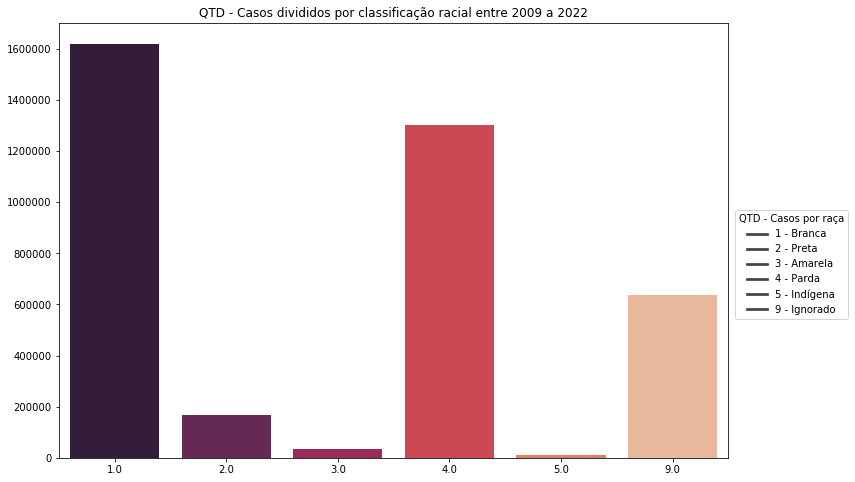

In [24]:
casos_raca = df_at['CS_RACA'].value_counts()
print("Total de casos divididos por classificação racial\n", casos_raca)
x = list(casos_raca.index)
y = list(casos_raca.values)
lb = ['1 - Branca','2 - Preta','3 - Amarela','4 - Parda','5 - Indígena','9 - Ignorado']
plt.figure(figsize=(12, 8))
plt.title("QTD - Casos divididos por classificação racial entre 2009 a 2022")
sns.barplot(x = x, y = y, palette = 'rocket')
plt.legend(title='QTD - Casos por raça', loc = (1.01, 0.32), labels = lb)
plt.show()


# Quantidade de casos agrupados por classificação racial do paciente ao longo de cada ano 
* Classificação exposta no dicionário de dados 
<br>1 - Branca
<br>2 - Preta
<br>3 - Amarela
<br>4 - Parda (pessoa que se declarou mulata, cabocla, cafuza, mameluca ou mestiça de preto com pessoa de outra cor ou raça)
<br>5 - Indígena
<br>9 - Ignorado

CS_RACA,1.0,2.0,3.0,4.0,5.0,9.0
ANO,,,,,,
2009.0,60463,3783,740,12794,340,6765
2010.0,6835,485,113,2360,93,1189
2011.0,2721,204,36,562,19,624
2012.0,14096,777,125,2837,45,2322
2013.0,22011,1369,270,6763,82,4296
2014.0,10215,810,139,4293,146,2629
2015.0,8119,650,77,3083,46,2112
2016.0,30531,2170,330,11332,413,7508
2017.0,15418,1139,183,7852,219,3897


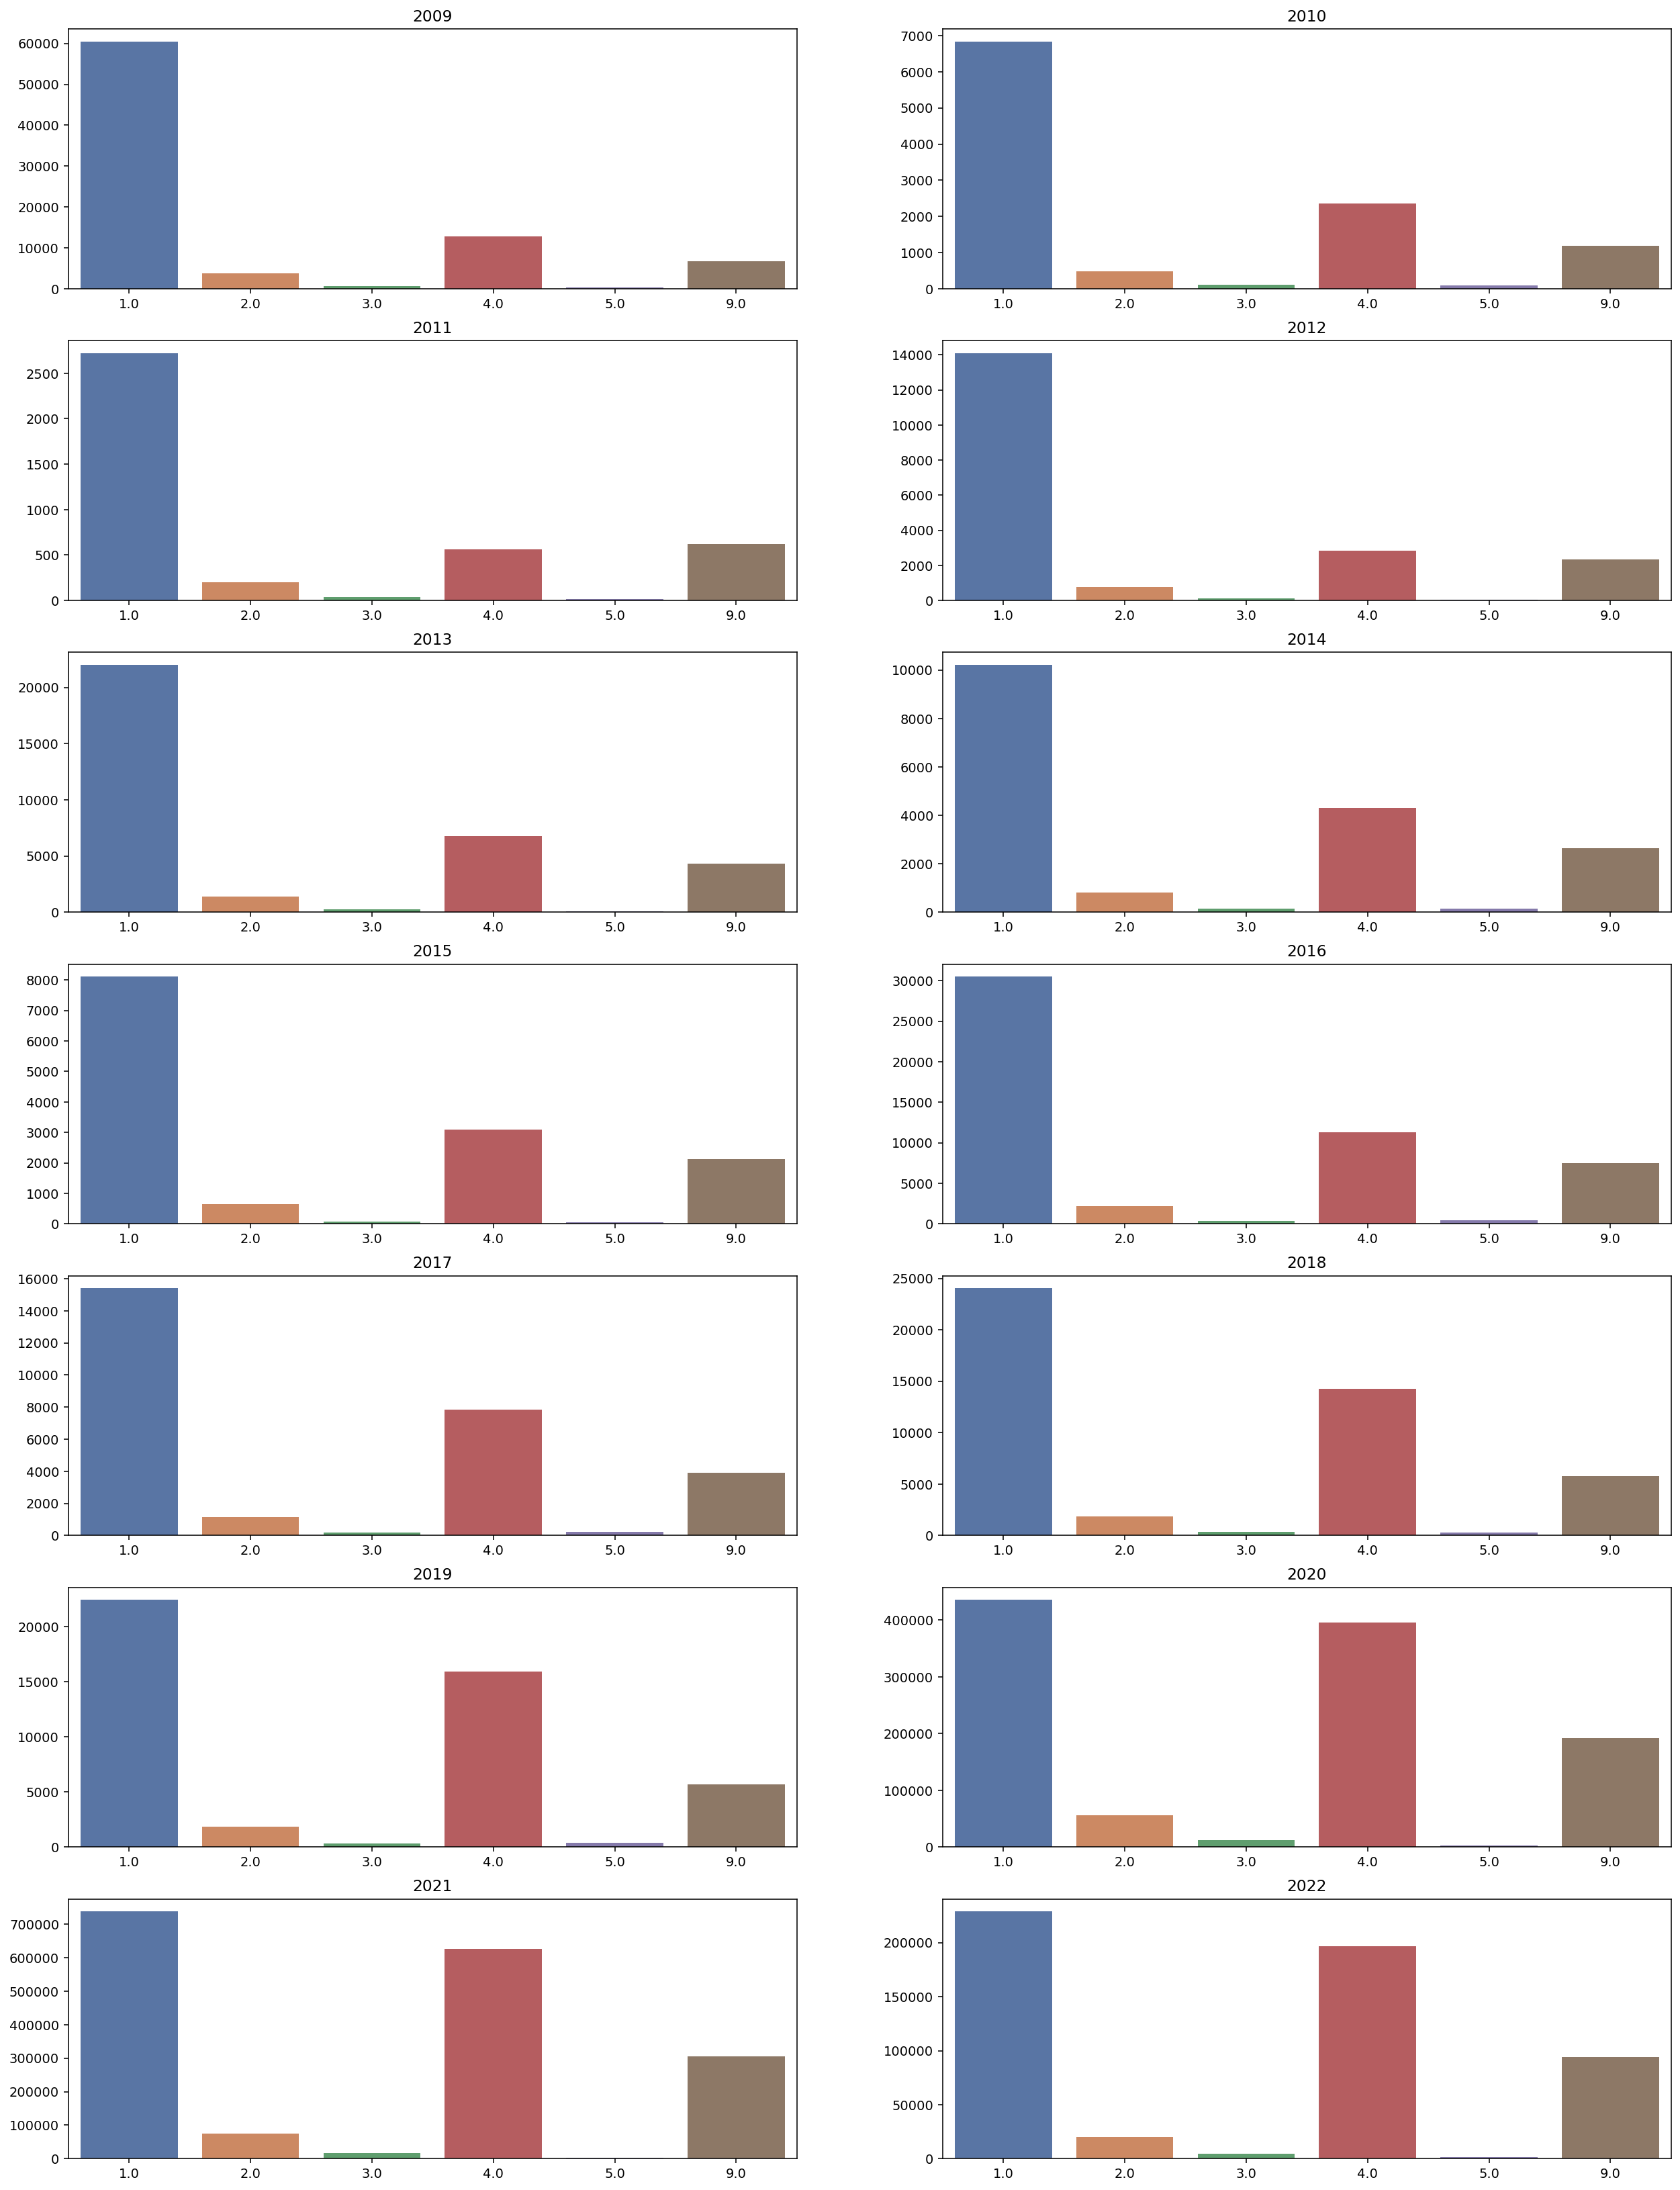

In [25]:
def CasoAGPSEX(data):
    fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(22, 30), dpi=140)
    df_filtrado = pd.DataFrame()
    l = 0
    c = 0
    for j in range(2009, 2023):
        filtro2 = data[data['ANO'] == j]
        QtD_CASOS_RA = filtro2.groupby(['ANO','CS_RACA'])['CS_RACA'].count()#Realiza o agrupamento p/ANO e classificação racial do paciente
        QtD_CASOS_RA = QtD_CASOS_RA.unstack()#Desempilha os dados
        y_values = QtD_CASOS_RA.values
        y_values = np.squeeze(y_values)#Remove as dimensões de tamanho de uma matriz para fazer a plotagem 
        x_values = list(QtD_CASOS_RA.columns.values)
        #Se a linha e a coluna forem menores que o limite realiza a plotagem 
        if (l < 7 and c < 2):
            #Plotando a quantidade de casos por classificação racial do paciente 
            sns.barplot(x = x_values, y = y_values , ax = axes[l,c], palette="deep"); axes[l,c].set_title(j)
            c = c + 1
        if (c > 1):
            c = 0
            l = l + 1
            
        df_filtrado = df_filtrado.append(QtD_CASOS_RA)
    display(df_filtrado)

CasoAGPSEX(df_at)

# Relacionar a quantidade de casos relatados com o índice de desenvolvimento humano - IDH
* Informação do IDH obtidas na plataforma AtlasBr - Link: http://www.atlasbrasil.org.br/

In [26]:
def AgrupaDados(dataFrame, ano, INFO_IDH, COD):
    
    filtro = dataFrame[dataFrame['ANO'] == ano]
    
    QtD_CASOS_MUNI = filtro.groupby([COD, INFO_IDH], as_index=False)[COD].count()
    QtD_CASOS_MUNI = QtD_CASOS_MUNI.sort_values(INFO_IDH)
    df = pd.DataFrame(QtD_CASOS_MUNI)
    
    display(df)
    
    # Informa o número de casos, número médio, máximo, mínimo e o desvio padrão dos casos 
    QTD_casos = df[COD].sum()
    N_MUNI_casos = len(df[COD])
    MD_casos = df[COD].mean()
    MAX_casos = df[COD].max()
    MIN_casos = df[COD].min()
    SD_casos = df[COD].std()
    
    #Quantidade de casos onde o IDH é baixo, médio, alto e muito alto 
    idh_baixo = df[df[INFO_IDH] < 0.6] # IDH Baixo e muito baixo 
    idh_medio = df[(df[INFO_IDH] >= 0.6) & (df[INFO_IDH] < 0.7)] #IDH Medio 
    idh_alto = df[(df[INFO_IDH] >= 0.7) & (df[INFO_IDH] < 0.8)] #IDH alto 
    idh_MAlto = df[df[INFO_IDH] >= 0.8] #IDH muito alto 
    
    
    print("OBS. para interpretação: \nCO_MUN_NOT - Código do município da unidade de notificação\nCO_MUN_RES - Código do município de residência do paciente")
    print("\n----------------Informações----------------------\n")
    print(f"Análise segundo dados de  {COD}")
    print(f"Quantidade de casos ocorridos em {ano} : {QTD_casos}")
    print("Quantidade de municípios com casos: ", N_MUNI_casos)
    print(f"Média de casos por município: {MD_casos:.2f}")
    print("Máximo de cados por município: ",MAX_casos)
    print("Mínimo de casos por município: ", MIN_casos)
    print(f"Desvio padrão entre número de casos: {SD_casos:.2f}")
    
    print('Quantidade de casos IDH Muito baixo e baixo: ',idh_baixo[COD].sum())
    print('Quantidade de casos IDH Médio: ',  idh_medio[COD].sum())
    print('Quantidade de casos IDH Alto: ', idh_alto[COD].sum())
    print('Quantidade de casos IDH Muito Alto: ', idh_MAlto[COD].sum())
    
    y =  [idh_baixo[COD].sum(), idh_medio[COD].sum(), idh_alto[COD].sum(), idh_MAlto[COD].sum()]
    x =  ['baixo','medio','alto','M_alto']
    
    plt.figure(figsize=(12, 8))
    plt.title("QTD Casos X IDH")
    sns.barplot(x = x, y = y, palette="deep")
    plt.xlabel("IDH", size = 12)
    plt.ylabel("QTD_Casos", size = 12)
    
    

   
  

In [27]:
#Abertura do arquivo obtido na plataforma Atlas Brasil que possui as informações sobre IDH
path_AT_IDH = r"C:\Users\eluar\Documents\Estudo_IA_Python\AESOP_Projeto\Dados_AESOP\DADOS_ATLAS_BR_IDH\IDH - municipios_Brasil.xlsx"
df_idh = pd.read_excel(path_AT_IDH)

df_idh = df_idh[df_idh['ANO'] == 2010] # Aplica um filtro para pegar apenas o IDH mais atual disponível até a data, ou seja, pegar informações de 2010 e deixar as informações de 1991 de fora da análise 
df_idh.drop(['UF','Codmun6','ANO','Município'], axis = 1, inplace = True)#Apaga as colunas sem uso 

#aplica um merge para obter o IDH da unidade de atendimento que relatou o caso 
dfCOMP_IDH = pd.merge(df_at, df_idh, how = 'left', left_on = df_at['CO_MUN_NOT'], right_on = df_idh['Codmun7'])

#Apaga a coluna para evitar duplicada  do código do IBGE do município do paciente (CO_MUN_NOT)
dfCOMP_IDH.drop(['key_0','Codmun7'], axis = 1, inplace = True)

#Renomeia as colunas para manter o padrão baseado na unidade de atendimento 
dfCOMP_IDH.rename(columns={'key_0':'CO_MUN_NOT','IDHM':'IDHM_UNI_NOT','IDHM_E':'IDHM_E_UNI_NOT','IDHM_L':'IDHM_L_UNI_NOT','IDHM_R':'IDHM_R_UNI_NOT'}, inplace = True)


dfCOMP_IDH['CO_MUN_RES'] = dfCOMP_IDH['CO_MUN_RES'].fillna(0, inplace = False)# Insere 0 nas linhas NaN do campo CO_MUN_RES
dfCOMP_IDH['CO_MUN_RES'] = dfCOMP_IDH['CO_MUN_RES'].astype('int64')# Altera o tipo da coluna CO_MUN_RES para int64

#aplica um merge para obter o IDH da cidade do paciente 
dfCOMP_IDH = pd.merge(dfCOMP_IDH, df_idh, how = 'left', left_on = dfCOMP_IDH['CO_MUN_RES'], right_on = df_idh['Codmun7'])


#Apaga a coluna para evitar duplicada do código do IBGE do município do paciente (CO_MUN_RES)
dfCOMP_IDH.drop(['key_0','Codmun7'], axis = 1, inplace = True)

#Renomeia as colunas para manter o padrão baseado na unidade de atendimento 
dfCOMP_IDH.rename(columns={'IDHM':'IDHM_MUN_RES','IDHM_E':'IDHM_E_MUN_RES','IDHM_L':'IDHM_L_MUN_RES','IDHM_R':'IDHM_R_MUN_RES'}, inplace = True)

display(dfCOMP_IDH)




,DT_NOTIFIC,DT_SIN_PRI,DT_NASC,CS_SEXO,CS_RACA,CLASSI_FIN,CLASSI_OUT,CRITERIO,SEM_NOT,SG_UF_NOT,SG_UF,ID_MUNICIP,CO_MUN_NOT,LAT_MUNI,LON_MUNI,ID_MN_RESI,CO_MUN_RES,LAT_MUNI_RES,LON_MUNI_RES,SEM_PRI,ANO,MES,IDHM_UNI_NOT,IDHM_E_UNI_NOT,IDHM_L_UNI_NOT,IDHM_R_UNI_NOT,IDHM_MUN_RES,IDHM_E_MUN_RES,IDHM_L_MUN_RES,IDHM_R_MUN_RES
0,2009-12-10,09/12/2009,06/04/1953,M,1.0,1.0,NaN,1.0,49,RO,SP,Porto Velho,1100205,-8.76077,-63.8999,Alta Floresta D'Oeste,1100015,-11.92830,-61.9953,NaN,2009.0,12.0,0.736,0.638,0.819,0.764,0.641,0.526,0.763,0.657
1,2009-08-14,07/08/2009,12/06/1990,M,NaN,3.0,NaN,1.0,32,MS,RO,Campo Grande,5002704,-20.44860,-54.6295,Alta Floresta D'Oeste,1100015,-11.92830,-61.9953,NaN,2009.0,8.0,0.784,0.724,0.844,0.790,0.641,0.526,0.763,0.657
2,2009-08-10,03/08/2009,15/01/2009,M,1.0,3.0,NaN,1.0,32,MG,RO,Belo Horizonte,3106200,-19.91020,-43.9266,Ariquemes,1100023,-9.90571,-63.0325,NaN,2009.0,8.0,0.810,0.737,0.856,0.841,0.702,0.600,0.806,0.716
3,2009-08-19,19/08/2009,10/03/1959,F,1.0,2.0,INFLUENZA SANZONAL,2.0,33,RO,PA,Cacoal,1100049,-11.43430,-61.4562,Cacoal,1100049,-11.43430,-61.4562,NaN,2009.0,8.0,0.718,0.620,0.821,0.727,0.718,0.620,0.821,0.727
4,2009-08-19,19/08/2009,01/10/1989,F,1.0,2.0,INFLUENZA SANZONAL,2.0,33,RO,PA,Cacoal,1100049,-11.43430,-61.4562,Cacoal,1100049,-11.43430,-61.4562,NaN,2009.0,8.0,0.718,0.620,0.821,0.727,0.718,0.620,0.821,0.727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827103,2022-09-03,03/09/2022,19/12/1944,F,4.0,4.0,NaN,2.0,35,PE,PE,Jaboatão dos Guararapes,2607901,-8.11298,-35.0150,Abreu e Lima,2600054,-7.90072,-34.8984,35.0,2022.0,9.0,0.717,0.642,0.830,0.692,0.679,0.632,0.791,0.625
3827104,2022-12-05,30/11/2022,13/06/1992,F,9.0,4.0,NaN,1.0,49,RJ,RJ,Niterói,3303302,-22.88320,-43.1034,Niterói,3303302,-22.88320,-43.1034,48.0,2022.0,12.0,0.837,0.773,0.854,0.887,0.837,0.773,0.854,0.887
3827105,2022-12-06,30/11/2022,17/10/1975,M,4.0,NaN,NaN,NaN,49,MS,MS,Dourados,5003702,-22.22310,-54.8120,Fátima do Sul,5003801,-22.37890,-54.5131,48.0,2022.0,12.0,0.747,0.657,0.843,0.753,0.714,0.621,0.815,0.719
3827106,2022-01-31,22/01/2022,01/06/2020,M,4.0,4.0,NaN,1.0,5,CE,CE,Várzea Alegre,2314003,-6.78264,-39.2942,Várzea Alegre,2314003,-6.78264,-39.2942,3.0,2022.0,1.0,0.629,0.576,0.759,0.569,0.629,0.576,0.759,0.569


# Avalie anualmente a relação entre casos e IDH

Digite:
1 - Unidade de atendimento x IDH 
2 - Pciente x IDM
1
Entre com o ano entre 2009 a 2022: 2020
Digite:
1 - Filtrar pelo IDHM 
2 - Filtrar pelo IDHM de Ensino
3 - Filtrar pelo IDHM de Longevidade
4 - Filtrar pelo IDHM de Renda:
1


,IDHM_UNI_NOT,CO_MUN_NOT
163,0.418,15
309,0.443,1
41,0.450,3
324,0.452,3
131,0.453,2
...,...,...
1638,0.845,2654
2313,0.845,1781
2342,0.847,3653
1725,0.854,1


OBS. para interpretação: 
CO_MUN_NOT - Código do município da unidade de notificação
CO_MUN_RES - Código do município de residência do paciente

----------------Informações----------------------

Análise segundo dados de  CO_MUN_NOT
Quantidade de casos ocorridos em 2020 : 1142808
Quantidade de municípios com casos:  3016
Média de casos por município: 378.92
Máximo de cados por município:  135910
Mínimo de casos por município:  1
Desvio padrão entre número de casos: 3143.75
Quantidade de casos IDH Muito baixo e baixo:  21500
Quantidade de casos IDH Médio:  101267
Quantidade de casos IDH Alto:  682285
Quantidade de casos IDH Muito Alto:  337756


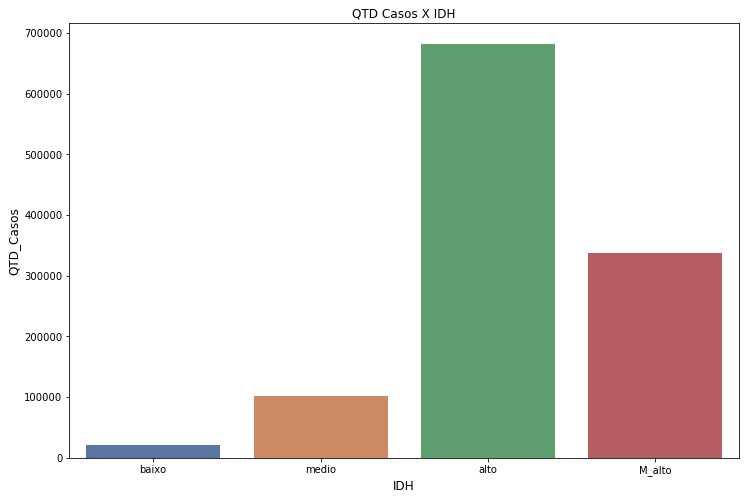

In [28]:
Anos = [x  for x in range(2009, 2022)] # cria um vetor com as datas de registros disponíveis 

IDH = ""
COD = ""

#Define se o filtro para geração da análise será pela localidade da unidade de atendimento ou do paciente 
info = int(input("Digite:\n1 - Unidade de atendimento x IDH \n2 - Pciente x IDM\n"))
while (info > 2 or info < 1):
    info = int(input("Digite:\n1 - Unidade de atendimento x IDH \n2 - Pciente x IDM\n"))

ano = int(input("Entre com o ano entre 2009 a 2022: "))

while (ano not in Anos):
    ano = int(input("Entre com o ano valido (2009 a 2022): "))
    
op =  int(input('Digite:\n1 - Filtrar pelo IDHM \n2 - Filtrar pelo IDHM de Ensino\n3 - Filtrar pelo IDHM de Longevidade\n4 - Filtrar pelo IDHM de Renda:\n'))

while (op > 4 or op < 1):
    op =  int(input('Digite:\n1 - Filtrar pelo IDHM \n2 - Filtrar pelo IDHM de Ensino\n3 - Filtrar pelo IDHM de Longevidade\n4 - Filtrar pelo IDHM de Renda:\n'))


if (info == 1):
    
    COD = "CO_MUN_NOT"
    if (op  ==  1):
        IDH = "IDHM_UNI_NOT"    
    elif(op == 2):
        IDH = "IDHM_E_UNI_NOT"
    elif(op == 3):
        IDH = "IDHM_L_UNI_NOT"
    elif(op == 4):
        IDH = "IDHM_R_UNI_NOT"

elif(info == 2):
    
    COD = "CO_MUN_RES"
    if (op  ==  1):
        IDH = "IDHM_MUN_RES"    
    elif(op == 2):
        IDH = "IDHM_E_MUN_RES"
    elif(op == 3):
        IDH = "IDHM_L_MUN_RES"
    elif(op == 4):
        IDH = "IDHM_R_MUN_RES"


AgrupaDados(dfCOMP_IDH, ano, IDH, COD)

# Casos plotados no mapa do Brasil 

In [29]:
def plotScatterMapa(dataFrame, ano):
    
    #LAT_MUNI	LON_MUNI	ID_MN_RESI	CO_MUN_RES	LAT_MUNI_RES	LON_MUNI_RES	
    
    #fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 20), dpi=140)
    
    df = dataFrame[dataFrame['ANO'] == ano]
    
    QtD_CASOS_MUNI = df.groupby(['CO_MUN_RES', 'LAT_MUNI_RES','LON_MUNI_RES', 'IDHM_MUN_RES'], as_index=False)['CO_MUN_RES'].count()
    QtD_CASOS_MUNI = QtD_CASOS_MUNI.sort_values('CO_MUN_RES')
    df = pd.DataFrame(QtD_CASOS_MUNI)
    
    display(df)
    
    
    #if (COD ==  "CO_MUN_NOT"):
        
    df.plot.scatter(y = 'LAT_MUNI_RES', x = 'LON_MUNI_RES', c = df['CO_MUN_RES'], cmap = 'RdYlGn', figsize = (10,8))
        
    #elif(COD == "CO_MUN_RES"):
    
    

,LAT_MUNI_RES,LON_MUNI_RES,IDHM_MUN_RES,CO_MUN_RES
645,-1.85229,-45.1207,0.519,1
678,-7.24502,-41.5325,0.519,1
766,-8.50736,-42.4264,0.561,1
867,-10.81700,-44.8337,0.536,1
4630,-27.40690,-52.4084,0.723,1
...,...,...,...,...
3994,-25.41950,-49.2646,0.823,28157
942,-3.71664,-38.5423,0.754,30444
2301,-19.91020,-43.9266,0.810,35220
3231,-22.91290,-43.2003,0.799,57865


'\nAnos = [x  for x in range(2009, 2022)] # cria um vetor com as datas de registros disponíveis \n\nIDH = ""\nCOD = ""\n\n#Define se o filtro para geração da análise será pela localidade da unidade de atendimento ou do paciente \ninfo = int(input("Digite:\n1 - Unidade de atendimento x IDH \n2 - Pciente x IDM\n"))\nwhile (info > 2 or info < 1):\n    info = int(input("Digite:\n1 - Unidade de atendimento x IDH \n2 - Pciente x IDM\n"))\n\nano = int(input("Entre com o ano entre 2009 a 2022: "))\n\nwhile (ano not in Anos):\n    ano = int(input("Entre com o ano valido (2009 a 2022): "))\n    \nop =  int(input(\'Digite:\n1 - Filtrar pelo IDHM \n2 - Filtrar pelo IDHM de Ensino\n3 - Filtrar pelo IDHM de Longevidade\n4 - Filtrar pelo IDHM de Renda:\n\'))\n\nwhile (op > 4 or op < 1):\n    op =  int(input(\'Digite:\n1 - Filtrar pelo IDHM \n2 - Filtrar pelo IDHM de Ensino\n3 - Filtrar pelo IDHM de Longevidade\n4 - Filtrar pelo IDHM de Renda:\n\'))\n\n    \n\n\nif (info == 1):\n    \n    COD = "CO_MU

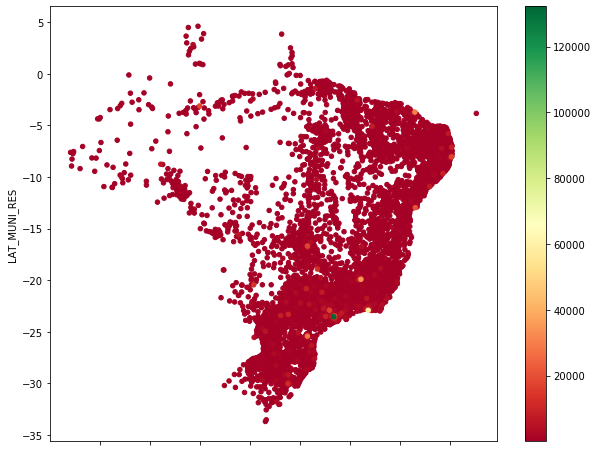

In [30]:
plotScatterMapa(dfCOMP_IDH, 2021)

"""
Anos = [x  for x in range(2009, 2022)] # cria um vetor com as datas de registros disponíveis 

IDH = ""
COD = ""

#Define se o filtro para geração da análise será pela localidade da unidade de atendimento ou do paciente 
info = int(input("Digite:\n1 - Unidade de atendimento x IDH \n2 - Pciente x IDM\n"))
while (info > 2 or info < 1):
    info = int(input("Digite:\n1 - Unidade de atendimento x IDH \n2 - Pciente x IDM\n"))

ano = int(input("Entre com o ano entre 2009 a 2022: "))

while (ano not in Anos):
    ano = int(input("Entre com o ano valido (2009 a 2022): "))
    
op =  int(input('Digite:\n1 - Filtrar pelo IDHM \n2 - Filtrar pelo IDHM de Ensino\n3 - Filtrar pelo IDHM de Longevidade\n4 - Filtrar pelo IDHM de Renda:\n'))

while (op > 4 or op < 1):
    op =  int(input('Digite:\n1 - Filtrar pelo IDHM \n2 - Filtrar pelo IDHM de Ensino\n3 - Filtrar pelo IDHM de Longevidade\n4 - Filtrar pelo IDHM de Renda:\n'))

    


if (info == 1):
    
    COD = "CO_MUN_NOT"
    if (op  ==  1):
        IDH = "IDHM_UNI_NOT"    
    elif(op == 2):
        IDH = "IDHM_E_UNI_NOT"
    elif(op == 3):
        IDH = "IDHM_L_UNI_NOT"
    elif(op == 4):
        IDH = "IDHM_R_UNI_NOT"

elif(info == 2):
    
    COD = "CO_MUN_RES"
    if (op  ==  1):
        IDH = "IDHM_MUN_RES"    
    elif(op == 2):
        IDH = "IDHM_E_MUN_RES"
    elif(op == 3):
        IDH = "IDHM_L_MUN_RES"
    elif(op == 4):
        IDH = "IDHM_R_MUN_RES"
        
"""

# Mapa de calor do baseado no número de casos relatados por unidade de atendimento e seu município 

In [31]:
import folium 
from folium import plugins 

In [32]:
def createHeatMapUNI(dataFrame, ano):
    filtro = dataFrame[dataFrame['ANO'] == ano]#Aplica uma filtragem por ano 
    df = filtro.groupby(['CO_MUN_NOT','LAT_MUNI', 'LON_MUNI'])['CO_MUN_NOT'].count() #Agrupa os dados para encontrar as quantidades de casos relatados por unidade de atendimento 
    df = pd.DataFrame(df)
    df.rename(columns={'CO_MUN_NOT':'N_Casos'}, inplace = True)
    df = df.reset_index()
    df_Map = pd.merge(df, df_at, how = 'left', left_on = df['CO_MUN_NOT'], right_on = df_at['CO_MUN_NOT'])#Faz um merge para obter informações que só existem na tabela original (df_at),  pois agrupar informações como nome das cidades exige muita memória e por isso estou agrupando apenas por código municipio
    df_Map = df_Map[['CO_MUN_NOT_x', 'SG_UF_NOT', 'ID_MUNICIP', 'LAT_MUNI_x', 'LON_MUNI_x', 'N_Casos']]
    df_Map.dropna(inplace=True)
    df_Map.drop_duplicates(inplace=True)
    display(df_Map)
    return df_Map 

In [33]:
ano =  int(input('Digite um ano entre 2009 a 2022: '))

df = createHeatMapUNI(df_at,ano)



Mapa = folium.Map(
    width = '100%',
    height = '100%',
    location=[-16.1237611, -59.9219642],    # Coordenadas retiradas do Google Maps
    zoom_start = 4
)

Mapa = Mapa.add_child(plugins.HeatMap(df[['LAT_MUNI_x', 'LON_MUNI_x','N_Casos']]))


for i in range(0, len(df)):
    folium.Circle(
        location = [df.iloc[i]['LAT_MUNI_x'], df.iloc[i]['LON_MUNI_x']],
        color = '#00FF69',
        fill = '#00A1B3',
        tooltip = 'Municipio: ' + str(df.iloc[i]['ID_MUNICIP'])+'<br>'
            +'Estado: '+str(df.iloc[i]['SG_UF_NOT'])+'<br>'
            +'QTD Casos: '+str(df.iloc[i]['N_Casos'])+'<br>',
        radius = 1000
    ).add_to(Mapa)

#Descomente para que o mapa apareça
#Mapa

Digite um ano entre 2009 a 2022: 2020


,CO_MUN_NOT_x,SG_UF_NOT,ID_MUNICIP,LAT_MUNI_x,LON_MUNI_x,N_Casos
0,1100015,RO,Alta Floresta D'Oeste,-11.92830,-61.9953,33
68,1100023,RO,Ariquemes,-9.90571,-63.0325,620
2470,1100049,RO,Cacoal,-11.43430,-61.4562,536
3993,1100056,RO,Cerejeiras,-13.18700,-60.8168,21
4102,1100072,RO,Corumbiara,-12.95510,-60.8947,2
...,...,...,...,...,...,...
3728047,5221601,GO,Uruaçu,-14.52380,-49.1396,88
3729446,5221858,GO,Valparaíso de Goiás,-16.06510,-47.9757,201
3730213,5222005,GO,Vianópolis,-16.74050,-48.5159,9
3730247,5222203,GO,Vila Boa,-15.03870,-47.0520,1


# Mapa de calor baseado no número de casos relatados por registro dos pacientes 

In [34]:
def createHeatMapRES(dataFrame, ano):
    filtro = dataFrame[dataFrame['ANO'] == ano]#Aplica uma filtragem por ano 
    df = filtro.groupby(['CO_MUN_RES', 'LAT_MUNI_RES', 'LON_MUNI_RES'])['CO_MUN_RES'].count() #Agrupa os dados para encontrar as quantidades de casos relatados por unidade de atendimento 
    df = pd.DataFrame(df)
    df.rename(columns={'CO_MUN_RES':'N_Casos'}, inplace = True)
    df = df.reset_index()
    df_Map = pd.merge(df, df_at, how = 'left', left_on = df['CO_MUN_RES'], right_on = df_at['CO_MUN_RES'])#Faz um merge para obter informações que só existem na tabela original (df_at),  pois agrupar informações como nome das cidades exige muita memória e por isso estou agrupando apenas por código município
    df_Map = df_Map[['CO_MUN_RES_x', 'ID_MN_RESI', 'LAT_MUNI_RES_x', 'LON_MUNI_RES_x', 'N_Casos']]
    df_Map.dropna(inplace=True)
    df_Map.drop_duplicates(inplace=True)
    display(df_Map)
    return df_Map 

In [35]:
ano =  int(input('Digite um ano entre 2009 a 2022: '))

df = createHeatMapRES(df_at,ano)



Mapa = folium.Map(
    width = '100%',
    height = '100%',
    location=[-16.1237611, -59.9219642],    # Coordenadas retiradas do Google Maps
    zoom_start = 4
)

Mapa = Mapa.add_child(plugins.HeatMap(df[['LAT_MUNI_RES_x', 'LON_MUNI_RES_x', 'N_Casos']]))


for i in range(0, len(df)):
    folium.Circle(
        location = [df.iloc[i]['LAT_MUNI_RES_x'], df.iloc[i]['LON_MUNI_RES_x']],
        color = '#00FF69',
        fill = '#00A1B3',
        tooltip = 'Municipio: ' + str(df.iloc[i]['ID_MN_RESI'])+'<br>'
            +'QTD Casos: '+str(df.iloc[i]['N_Casos'])+'<br>',
        radius = 1000
    ).add_to(Mapa)

#Descomente para que o mapa apareça
#Mapa

Digite um ano entre 2009 a 2022: 2020


,CO_MUN_RES_x,ID_MN_RESI,LAT_MUNI_RES_x,LON_MUNI_RES_x,N_Casos
0,1100015.0,Alta Floresta D'Oeste,-11.92830,-61.9953,69
197,1100023.0,Ariquemes,-9.90571,-63.0325,613
2451,1100031.0,Cabixi,-13.49450,-60.5520,5
2482,1100049.0,Cacoal,-11.43430,-61.4562,220
3374,1100056.0,Cerejeiras,-13.18700,-60.8168,32
...,...,...,...,...,...
3751682,5222005.0,Vianópolis,-16.74050,-48.5159,37
3751879,5222054.0,Vicentinópolis,-17.73220,-49.8047,24
3752023,5222203.0,Vila Boa,-15.03870,-47.0520,6
3752043,5222302.0,Vila Propício,-15.45420,-48.8819,6


# Mapa de calor animado demonstrando o crecimento da covide ao longo do tempo conforme a data de notificação e dados da unidade de atendimento 

In [36]:
import datetime
def createHeatMapRESTP1(dataFrame, ano):
    filtro = dataFrame[dataFrame['ANO'] == ano]#Aplica uma filtragem por ano 
    filtro =  filtro[['DT_NOTIFIC','LAT_MUNI','LON_MUNI']]#Seleciona os campos que iremos utilizar 
    filtro.rename(columns={'LAT_MUNI':'Latitude','LON_MUNI':'Longitude'}, inplace = True)#Renomeia as colunas
    filtro.dropna(inplace = True)
    
    filtro['DT_NOTIFIC'] = filtro['DT_NOTIFIC'].sort_values(ascending=True)#Ordena as datas 
    
    lat_long_list = []
    for i in filtro['DT_NOTIFIC'].unique():
        temp=[]
        for index, instance in filtro[filtro['DT_NOTIFIC'] == i].iterrows():
            temp.append([instance['Latitude'],instance['Longitude']])
        lat_long_list.append(temp)
    
    time_index = []
    for i in filtro['DT_NOTIFIC'].unique():
        time_index.append(i)
        #formatting the index
    #date_strings = [str(d) for d in time_index]
    date_strings = [d.strftime('%Y-%m-%d') for d in time_index]
    #date_strings = [d.strftime('%d/%m/%Y, %H:%M:%S') for d in time_index]
    
    return lat_long_list, date_strings

In [37]:
ano =  int(input('Digite um ano entre 2009 a 2022: '))


df, datas = createHeatMapRESTP1(df_at, ano)

Mapa = folium.Map(
    width = '100%',
    height = '100%',
    location=[-16.1237611, -59.9219642],    # Coordenadas retiradas do Google Maps
    zoom_start = 4
)

Mapa2 = plugins.HeatMapWithTime(df, radius = 10, index = datas, auto_play=True, max_opacity = 0.8)

Mapa2.add_to(Mapa)

#Descomente para que o mapa animado apareça 
#Mapa


Digite um ano entre 2009 a 2022: 2020


# Mapa de calor animado demonstrando o crecimento da covide ao longo do tempo conforme a data de notificação e dados da residência do paciente

In [38]:
import datetime
def createHeatMapRESTP2(dataFrame, ano):
    filtro = dataFrame[dataFrame['ANO'] == ano]#Aplica uma filtragem por ano 
    filtro =  filtro[['DT_NOTIFIC','LAT_MUNI_RES', 'LON_MUNI_RES']]#Seleciona os campos que iremos utilizar 
    filtro.rename(columns={'LAT_MUNI_RES':'Latitude','LON_MUNI_RES':'Longitude'}, inplace = True)#Renomeia as colunas 
    filtro.dropna(inplace = True)
    
    filtro['DT_NOTIFIC'] = filtro['DT_NOTIFIC'].sort_values(ascending=True)
    
    lat_long_list = []
    for i in filtro['DT_NOTIFIC'].unique():
        temp=[]
        for index, instance in filtro[filtro['DT_NOTIFIC'] == i].iterrows():
            temp.append([instance['Latitude'],instance['Longitude']])
        lat_long_list.append(temp)
    
    time_index = []
    for i in filtro['DT_NOTIFIC'].unique():
        time_index.append(i)
    
    date_strings = [d.strftime('%Y-%m-%d') for d in time_index]
    #date_strings = [d.strftime('%d/%m/%Y, %H:%M:%S') for d in time_index]
    
    return lat_long_list, date_strings

In [39]:
ano =  int(input('Digite um ano entre 2009 a 2022: '))


df, datas = createHeatMapRESTP2(df_at, ano)

Mapa = folium.Map(
    width = '100%',
    height = '100%',
    location=[-16.1237611, -59.9219642],    # Coordenadas retiradas do Google Maps
    zoom_start = 4
)

Mapa2 = plugins.HeatMapWithTime(df, radius = 10, index = datas, auto_play=True, max_opacity = 0.8)

Mapa2.add_to(Mapa)

#Descomente para que o mapa animado apareça
#Mapa


Digite um ano entre 2009 a 2022: 2020


# 